### Importing important libraries and warnings


In [196]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

# Dataframe libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline 

### Load the dataframe 

In [197]:
bike_df = pd.read_csv('day.csv')

### Undersatnding the Dataframe

In [198]:
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [199]:
bike_df.shape

(730, 16)

In [200]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [201]:
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Handle Missing values

As we have already seen there are no missing values. However, let us verify it again.
Checking if there is NULL values in the df

In [202]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No NULL values are present in the df

### Column Level Analysis

In [203]:
bike_df.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [204]:
# Renaming the column names for better understanding as the column names are confusing
column_dict = {
    'yr':'year', 
    'mnth':'months', 
    'hum':'humidity', 
    'cnt':'count'
} 

bike_df.rename(columns = column_dict, inplace= 'True')
bike_df.head()

instant      dteday  season  year  months  holiday  weekday  workingday  \
0        1  01-01-2018       1     0       1        0        1           1   
1        2  02-01-2018       1     0       1        0        2           1   
2        3  03-01-2018       1     0       1        0        3           1   
3        4  04-01-2018       1     0       1        0        4           1   
4        5  05-01-2018       1     0       1        0        5           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

   count  
0    985  
1    801  
2   1349  
3   1562  
4   1600

### Checking for duplicates values

In [205]:
bike_df.shape

(730, 16)

In [206]:
bike_df.drop_duplicates(subset = None, inplace = None)
bike_df.shape

(730, 16)

**No duplicate values present in the dataframe**

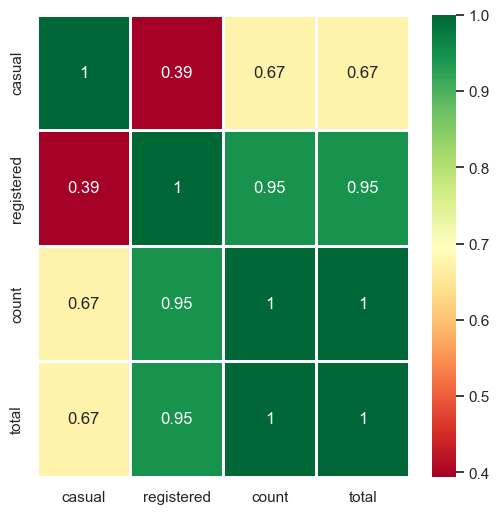

In [207]:
# Removing redundant columns
bike_cnt = bike_df[['casual', 'registered', 'count']]

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']

plt.figure(figsize = (6,6))
ax = sns.heatmap(bike_cnt.corr(), annot = True, cmap='RdYlGn', linewidth = 1)
plt.show()

In [208]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bike_df['days_old'] = (pd.to_datetime(bike_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

## Seems like count is just the sum of other two only, Hence
## Dropping the redundant columns

bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike_df.shape

(730, 13)

# Data Visualization


## Converting into categorical columns


*Converting season, month, weathersit and weekday to categorical columns*


In [209]:
# As per the Data Dictionary, categorising Season
bike_df.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
bike_df.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [210]:
bike_df

season  year  months  holiday  weekday  workingday  weathersit  \
0    Spring     0       1        0        1           1           2   
1    Spring     0       1        0        2           1           2   
2    Spring     0       1        0        3           1           1   
3    Spring     0       1        0        4           1           1   
4    Spring     0       1        0        5           1           1   
..      ...   ...     ...      ...      ...         ...         ...   
725  Spring     1      12        0        5           1           2   
726  Spring     1      12        0        6           0           2   
727  Spring     1      12        0        0           0           2   
728  Spring     1      12        0        1           1           1   
729  Spring     1      12        0        2           1           2   

          temp     atemp  humidity  windspeed  count  days_old  
0    14.110847  18.18125   80.5833  10.749882    985         0  
1    14.902598  17.68695   69.6087  16.652113    801         1  
2     8.050924   9.47025   43.7273  16.636703   1349         2  
3     8.200000  10.60610   59.0435  10.739832   1562         3  
4     9.305237  11.46350   43.6957  12.522300   1600         4  
..         ...       ...       ...        ...    ...       ...  
725  10.420847  11.33210   65.2917  23.458911   2114       725  
726  10.386653  12.75230   59.0000  10.416557   3095       726  
727  10.386653  12.12000   75.2917   8.333661   1341       727  
728  10.489153  11.58500   48.3333  23.500518   1796       728  
729   8.849153  11.17435   57.7500  10.374682   2729       729  

[730 rows x 13 columns]

In [211]:
# As per the Data Dictionary, categorising Months

bike_df.months.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike_df.months.value_counts()

months
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [212]:
# As per the Data Dictionary, categorising Weathersit
bike_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike_df.weathersit.value_counts()

weathersit
Clear             463
Misty             246
Light_rainsnow     21
Name: count, dtype: int64

In [213]:
# As per the Data Dictionary, categorising Weekday
bike_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike_df.weekday.value_counts()

weekday
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: count, dtype: int64

## Now, Analyzing Categorical Variables


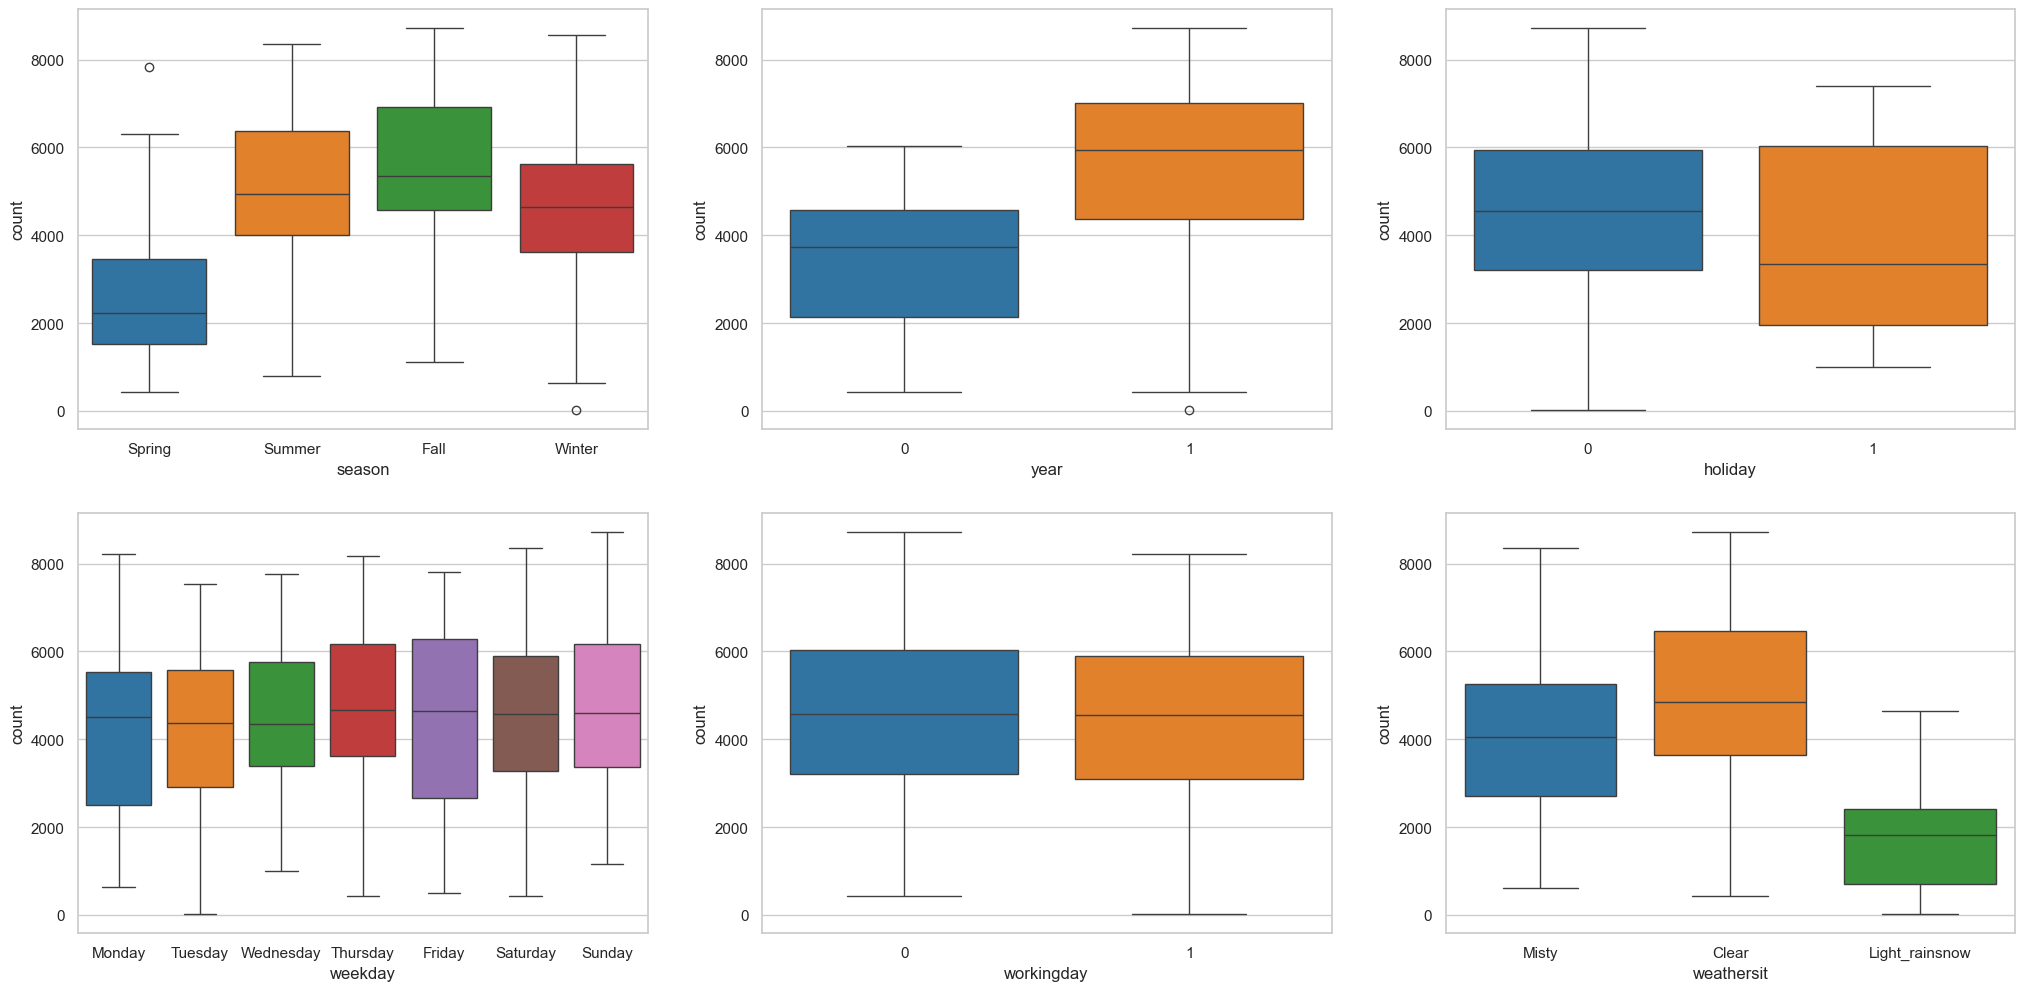

In [214]:
def boxplot_cat_var(categ_var,target, df):
    plt.figure(figsize=(25, 12))
    for i in range(0,len(categ_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = categ_var[i], y = target, data = df, palette='tab10')
    plt.show()

categ_var =['season','year','holiday','weekday','workingday','weathersit']
boxplot_cat_var(categ_var,'count', bike_df)

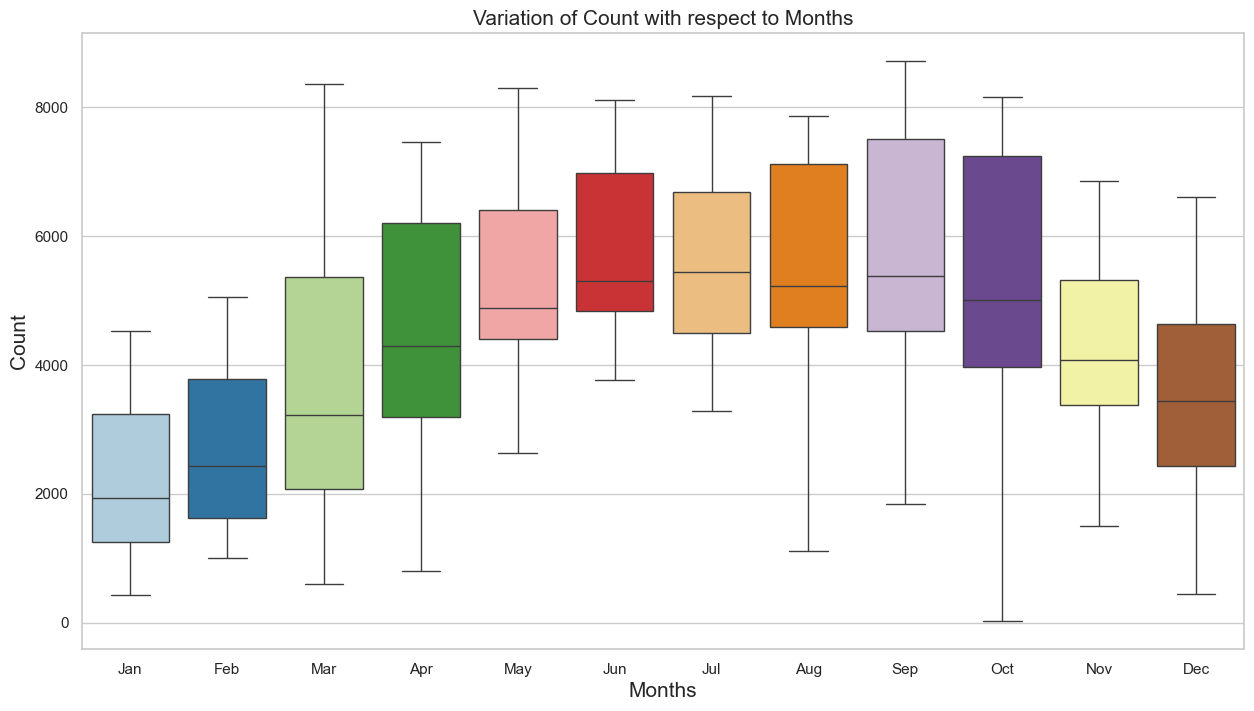

In [215]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'months', y = 'count', data = bike_df, palette='Paired').set_title('Variation of Count with respect to Months', fontsize = 15)
plt.xlabel("Months", fontsize = 15) 
plt.ylabel("Count", fontsize = 15) 
plt.show()

In [216]:
# Creating a Function for generating statistics for categorical variables

def generate_cat_stats(col, df):
    cat_df = df.groupby(col)['count'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/df['count'].sum()*100
    cat_df['count_perc']=cat_df['count']/df['count'].count()*100
    return round(cat_df,2)

In [217]:
# Creating a Function for generating plots for categorical variables

def generate_cat_plots(col, x, y,df):
    plt.figure(figsize = (x, y))
    plt.subplot(1,2,1)
    sns.barplot(data=df, x=col, y='count', palette='tab10')
    plt.subplot(1,2,2)
    sns.barplot(data=df, x=col, y='count', hue = 'year', palette = 'Paired')
    plt.legend(labels=['2018', '2019'])
    return

### Analyzing Seasons


In [218]:
generate_cat_stats('season', bike_df)

sum     mean  count  sum_perc  count_perc
season                                               
Fall    1061129  5644.30    188     32.24       25.75
Summer   918589  4992.33    184     27.91       25.21
Winter   841613  4728.16    178     25.57       24.38
Spring   469514  2608.41    180     14.27       24.66

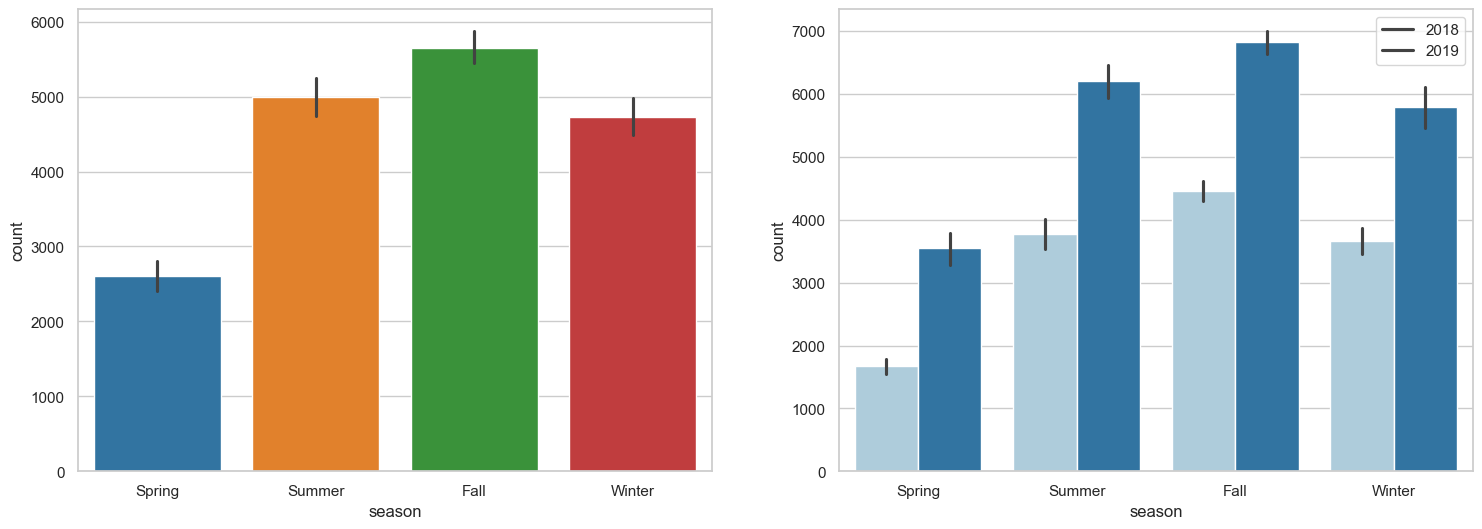

In [219]:
generate_cat_plots('season', 18,6, bike_df)

### **✅ Observation:**
- **32%** of the bike booking happened in `Fall`, followed by `Summer` & `Winter` with **27%** & **25%** of total booking respectively.

### Analyzing Months


In [220]:
generate_cat_stats('months', bike_df)

sum     mean  count  sum_perc  count_perc
months                                              
Aug     351194  5664.42     62     10.67        8.49
Jun     346342  5772.37     60     10.52        8.22
Sep     345991  5766.52     60     10.51        8.22
Jul     344948  5563.68     62     10.48        8.49
May     331686  5349.77     62     10.08        8.49
Oct     322352  5199.23     62      9.80        8.49
Apr     269094  4484.90     60      8.18        8.22
Nov     254831  4247.18     60      7.74        8.22
Mar     228920  3692.26     62      6.96        8.49
Dec     211036  3403.81     62      6.41        8.49
Feb     149518  2669.96     56      4.54        7.67
Jan     134933  2176.34     62      4.10        8.49

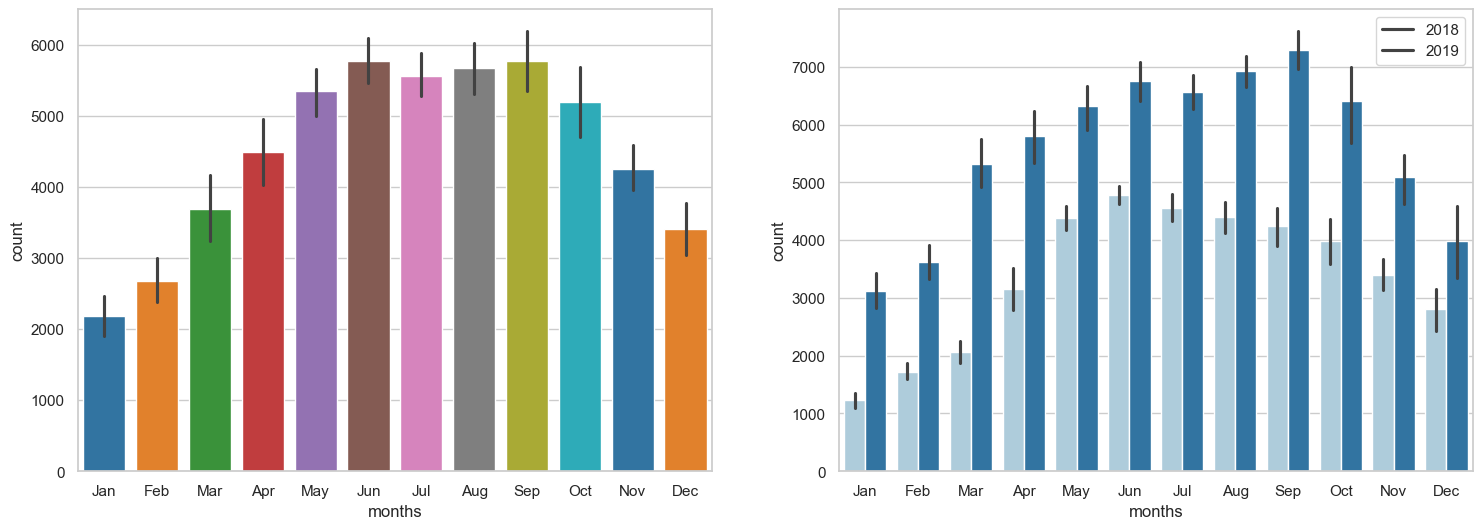

In [221]:
generate_cat_plots('months', 18,6, bike_df)

### **✅ Observation:**
- More than **10%** of the bike booking happend in the months of `May` to `Sep`.


### Analyzing Weather Situation


In [222]:
generate_cat_stats('weathersit', bike_df)

sum     mean  count  sum_perc  count_perc
weathersit                                                   
Clear           2257952  4876.79    463     68.61       63.42
Misty            995024  4044.81    246     30.24       33.70
Light_rainsnow    37869  1803.29     21      1.15        2.88

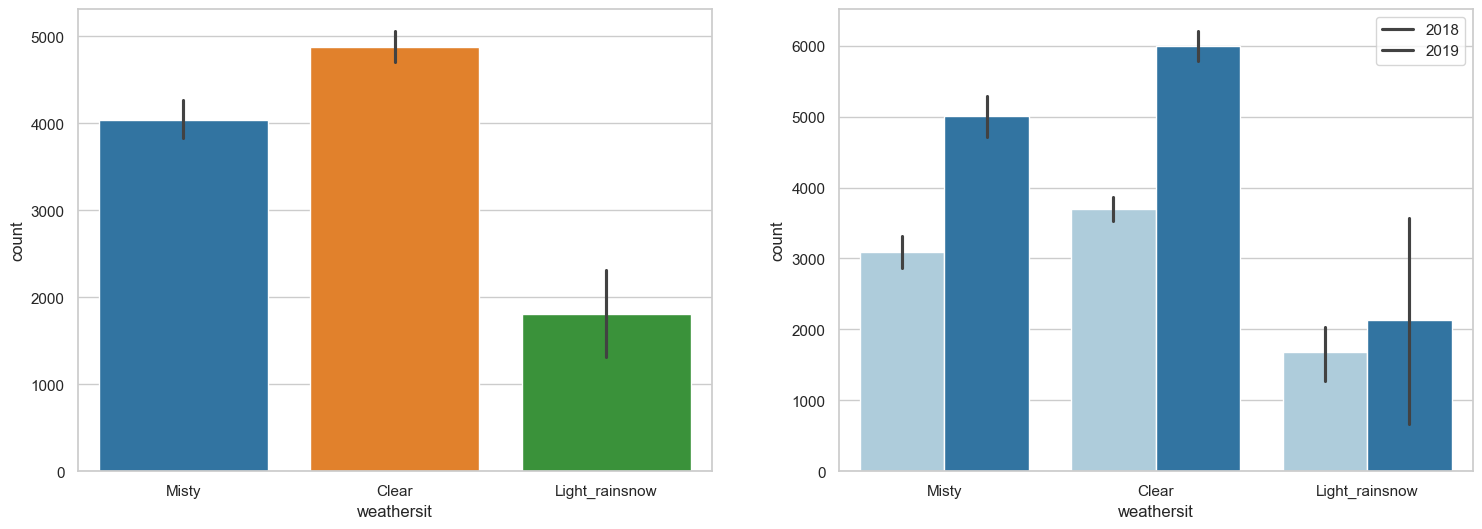

In [223]:
generate_cat_plots('weathersit', 18,6, bike_df)

### **✅ Observation:**
- During clear weather, **68.6%** of the booking happened. 
- Whereas only **30.24%** of booking happened in `Misty` weather.
- Very few bookings happened during `Light rain` and `snow` due to obvious reasons.


### Analyzing Weekday


In [224]:
generate_cat_stats('weekday', bike_df)

sum     mean  count  sum_perc  count_perc
weekday                                                
Thursday   487923  4691.57    104     14.83       14.25
Sunday     485235  4665.72    104     14.74       14.25
Saturday   481176  4626.69    104     14.62       14.25
Friday     478132  4597.42    104     14.53       14.25
Wednesday  462276  4444.96    104     14.05       14.25
Tuesday    448822  4274.50    105     13.64       14.38
Monday     447281  4259.82    105     13.59       14.38

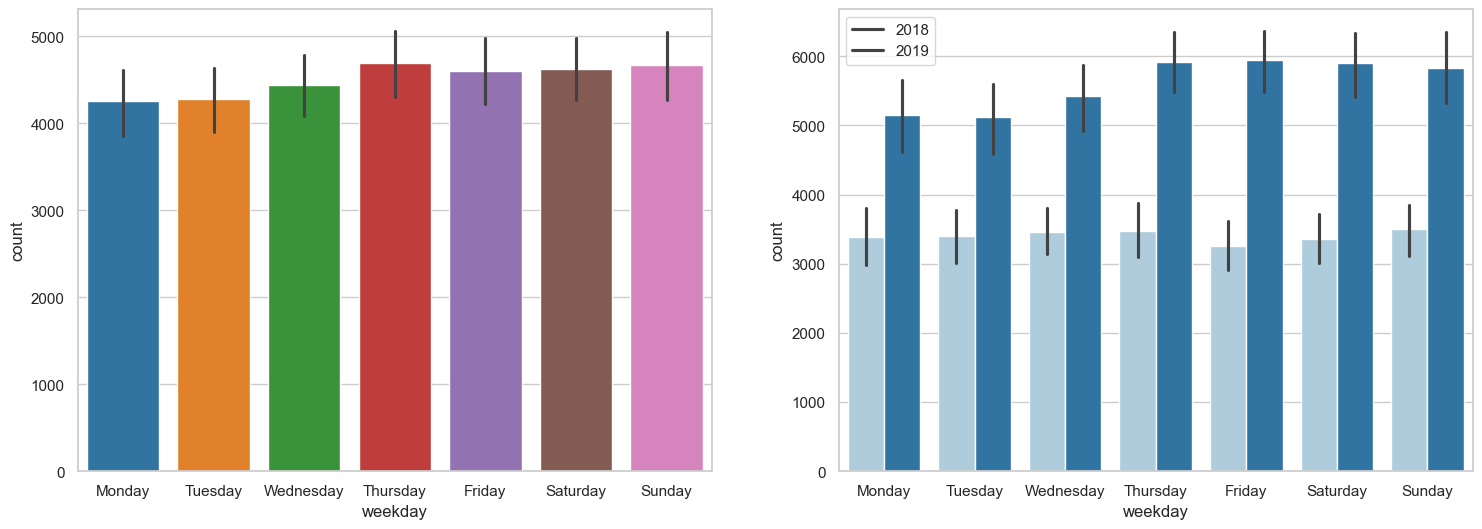

In [225]:
generate_cat_plots('weekday', 18,6, bike_df)

### **✅ Observation:**
- Bookings done on a weekday are almost `evenly distributed` i.e around **14%**.

### Analyzing Workingday


In [226]:
generate_cat_stats('workingday', bike_df)

sum     mean  count  sum_perc  count_perc
workingday                                               
1           2253988  4472.20    504     68.49       69.04
0           1036857  4587.86    226     31.51       30.96

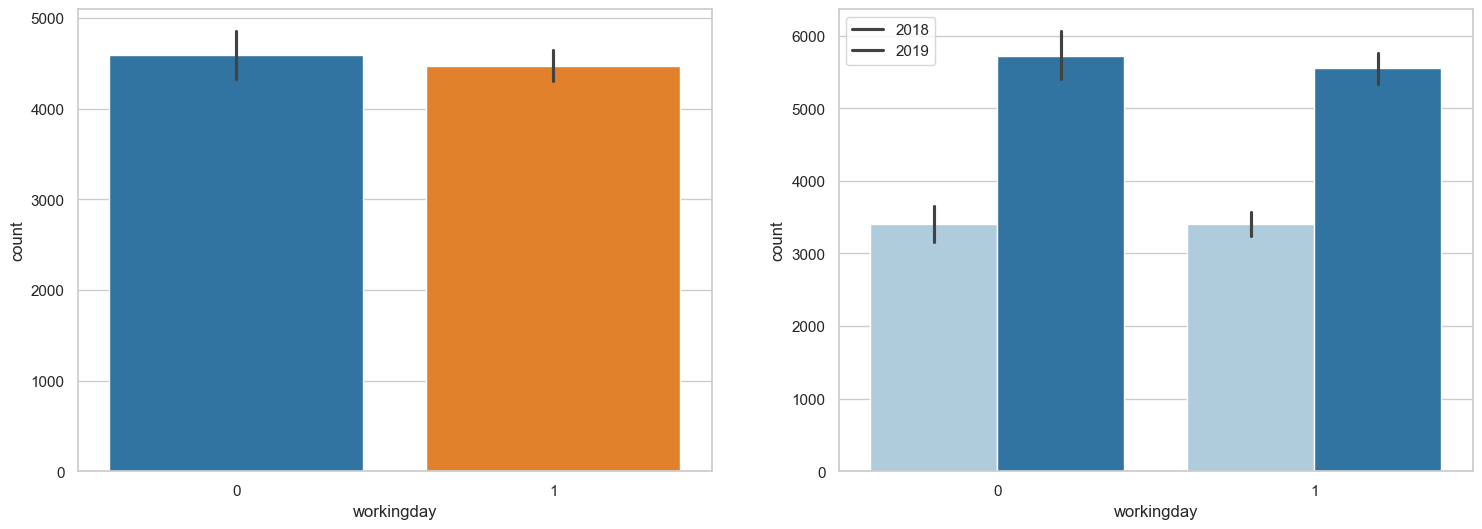

In [227]:
generate_cat_plots('workingday', 18,6, bike_df)

### **✅ Observation:**
- Almost **69%** of the bike booking happened on a working day.

### Analyzing Holiday


In [228]:
generate_cat_stats('holiday', bike_df)

sum    mean  count  sum_perc  count_perc
holiday                                              
0        3212410  4530.9    709     97.62       97.12
1          78435  3735.0     21      2.38        2.88

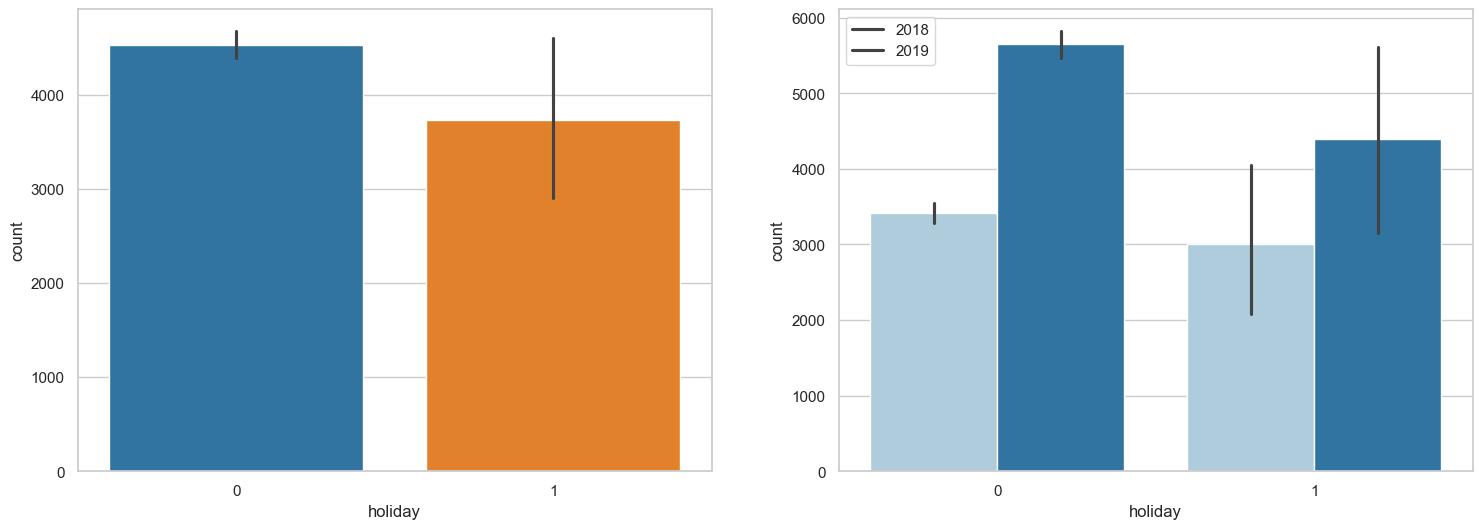

In [229]:
generate_cat_plots('holiday', 18,6, bike_df)

### **✅ Observation:**
- Around **97%** of bike rentals took place during `non-holiday` time.


### Analyzing Year


In [230]:
generate_cat_stats('year', bike_df)

sum     mean  count  sum_perc  count_perc
year                                               
1     2047742  5610.25    365     62.23        50.0
0     1243103  3405.76    365     37.77        50.0

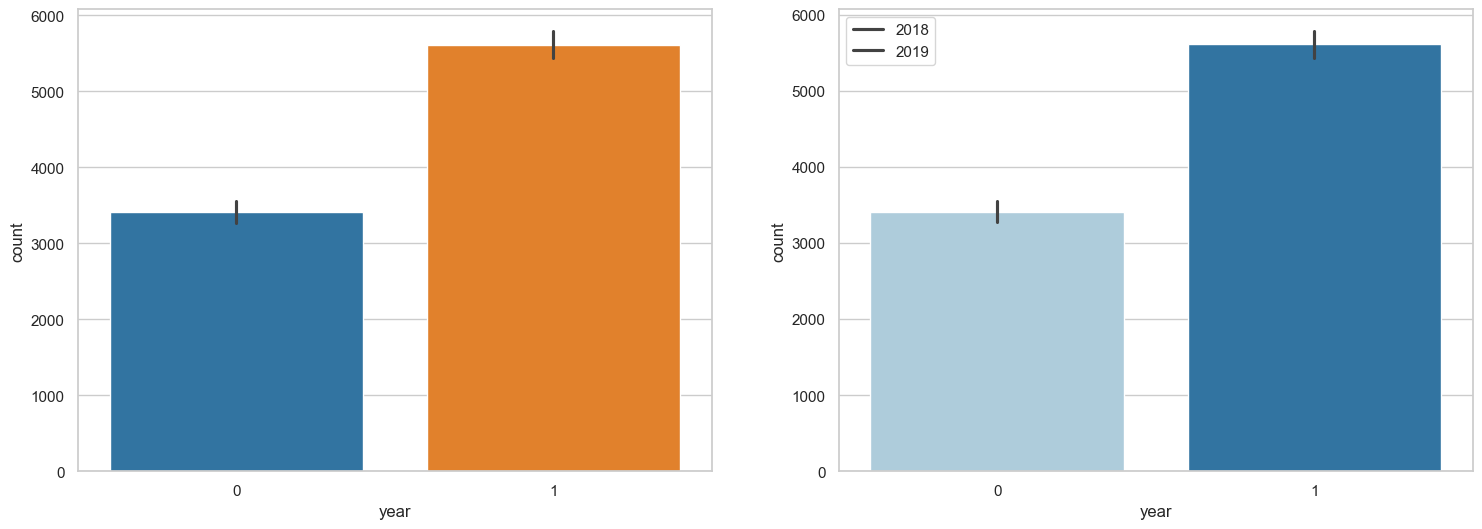

In [231]:
generate_cat_plots('year', 18,6, bike_df)

### **✅ Observation:**
- There has been a significant growth in demand during `2019` comapred to `2018`.

## Now,  Analysing Numerical Variable


In [232]:
bike_df['days_old']

0        0
1        1
2        2
3        3
4        4
      ... 
725    725
726    726
727    727
728    728
729    729
Name: days_old, Length: 730, dtype: int64

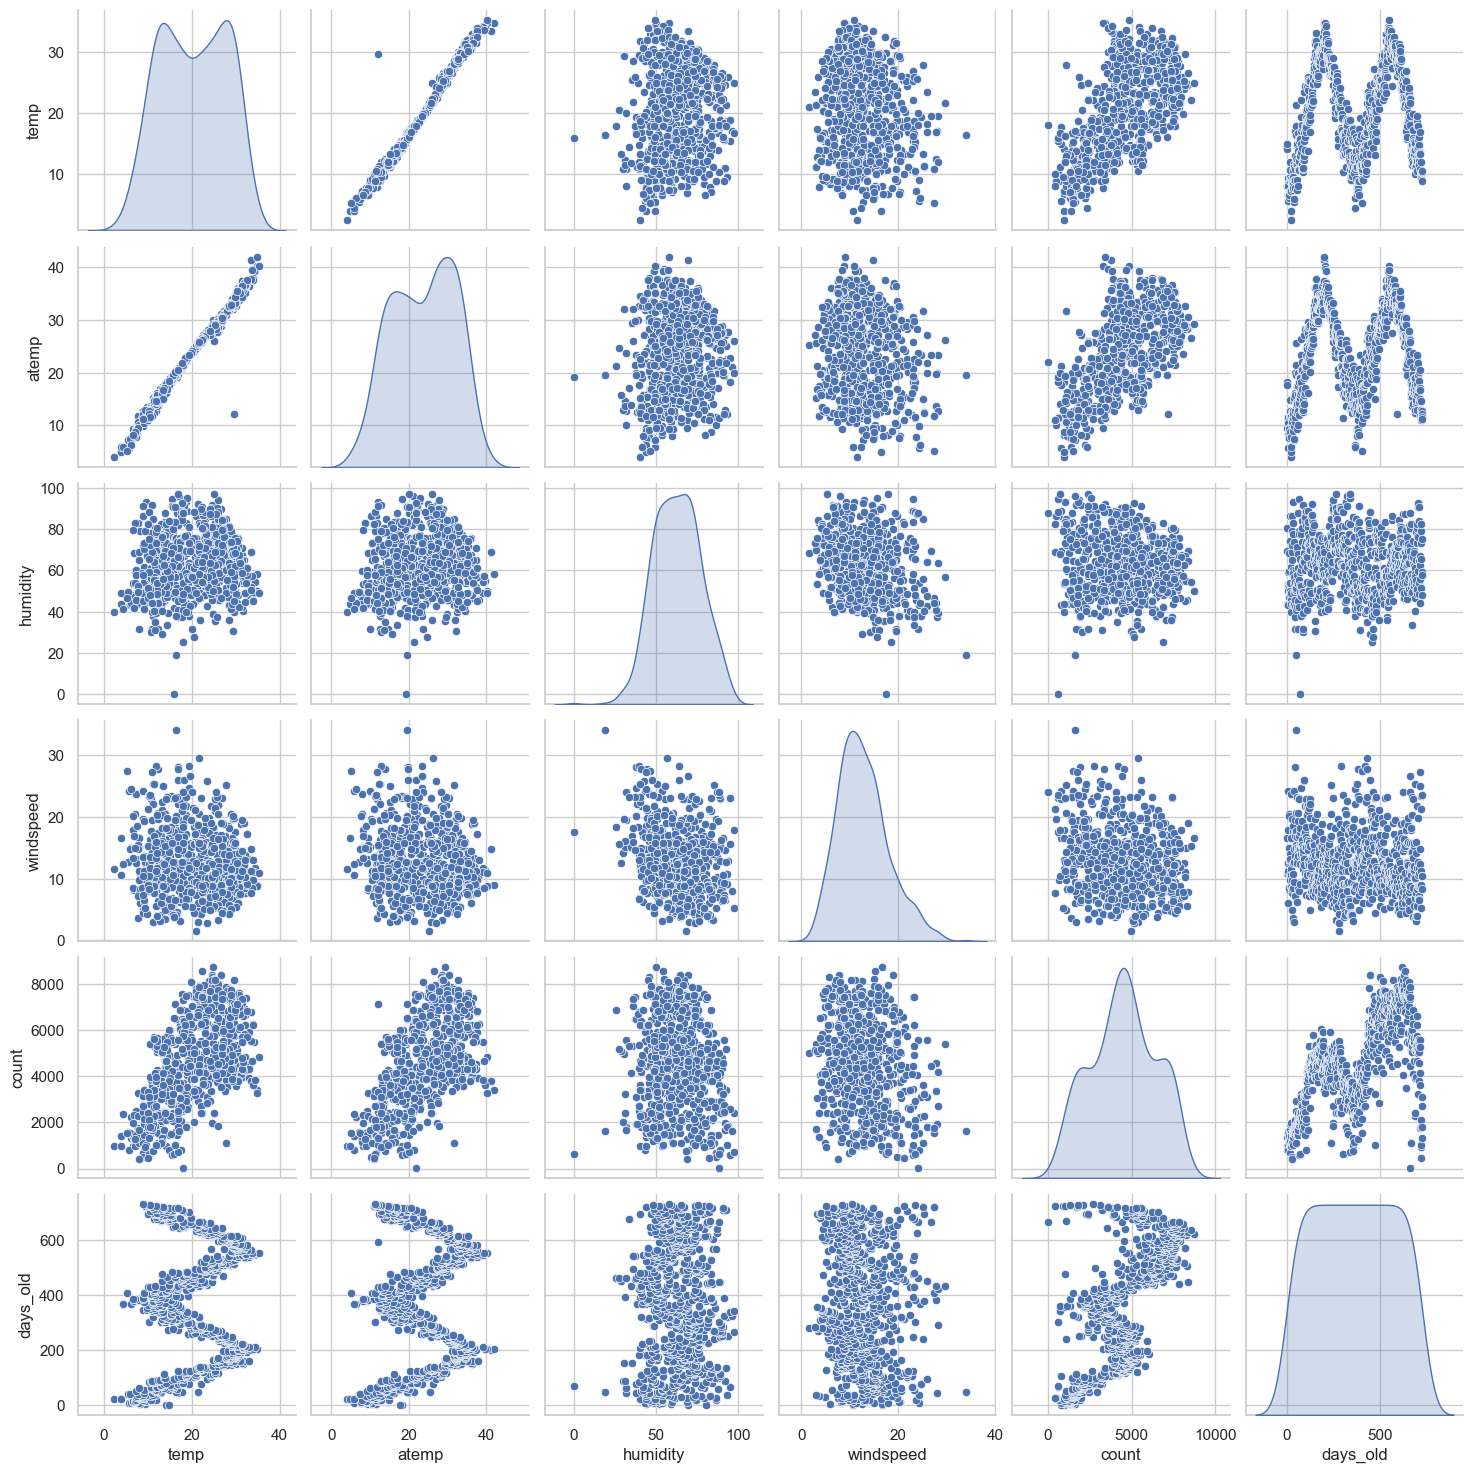

In [233]:
num_cols = ['temp','atemp','humidity','windspeed','count', 'days_old']
bike_num = bike_df[num_cols]
sns.pairplot(bike_num,diag_kind='kde')
plt.show()

### **✅ Observation:**
- It seems there is a Linear relation between `temp`, `atemp` and `cnt`, we can see both variables has close values.


Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

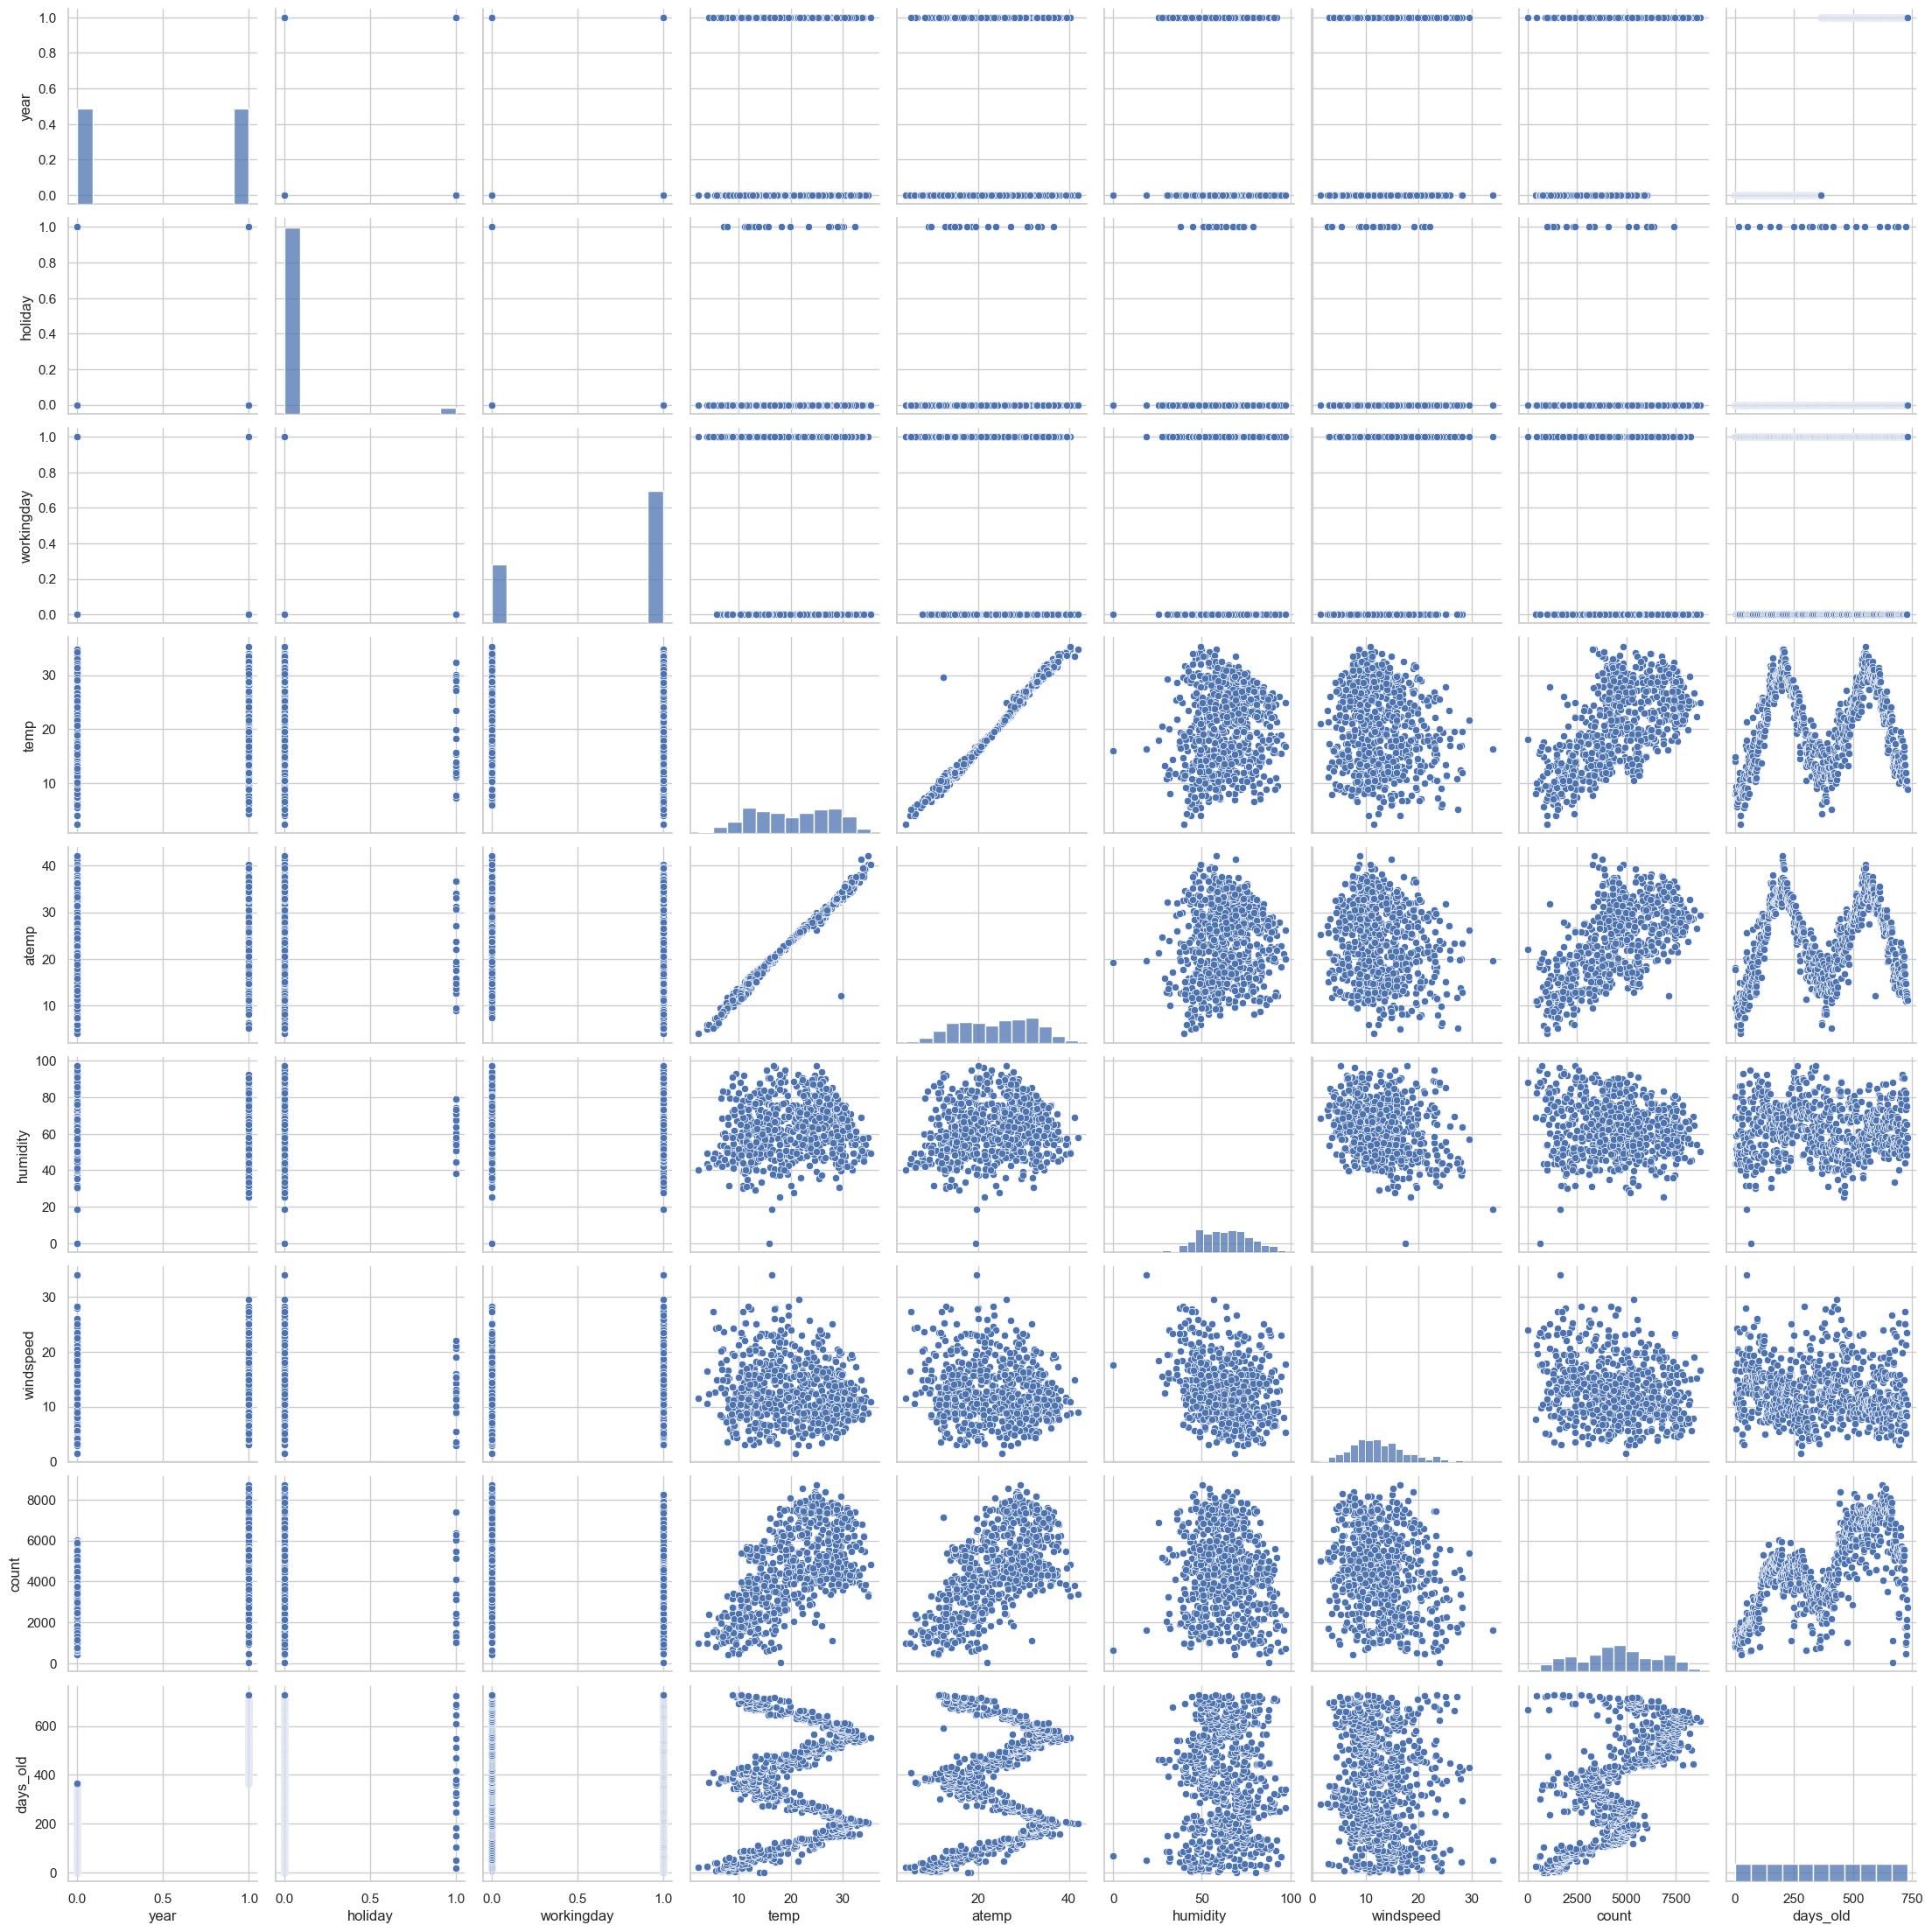

In [234]:
plt.figure(figsize=(20,15))
sns.pairplot(bike_df)
plt.show()

<Axes: >

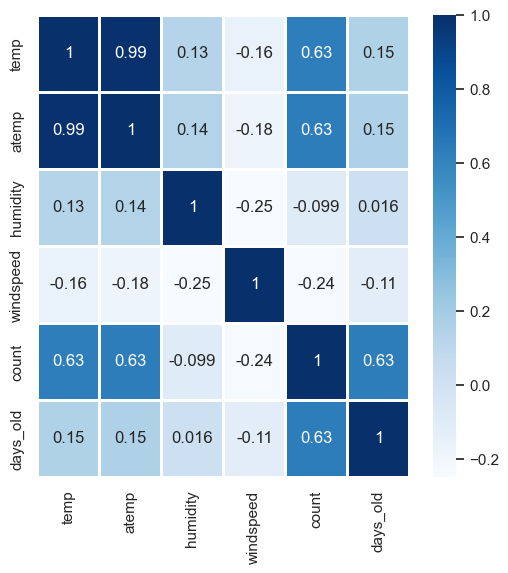

In [235]:
plt.figure(figsize = (6, 6))
sns.heatmap(bike_num.corr(), cmap='Blues', annot=True, linewidth=1)

<Figure size 4000x600 with 0 Axes>

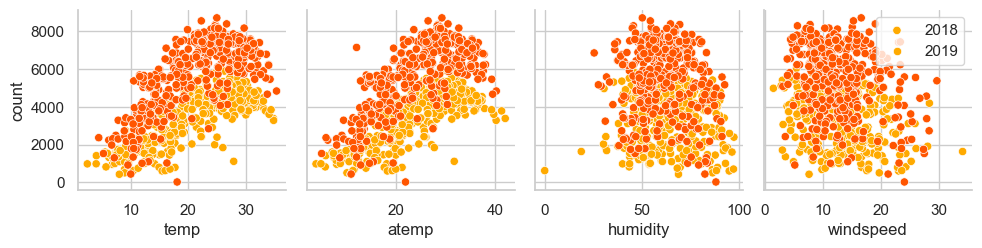

In [236]:
# Checking the impact of year against the numerical variable: 
plt.figure(figsize = (40,6))
ax = sns.pairplot(x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars=['count'] , data=bike_df, hue='year', palette='autumn_r')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

From the correlation map, `temp`, `atemp` and `days_old` seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

# Preparation of Data


## Creating Dummy variables

In [237]:
# Dummy Variable
months=pd.get_dummies(bike_df.months,drop_first=True, dtype=int)
weekdays=pd.get_dummies(bike_df.weekday,drop_first=True, dtype=int)
weather_sit=pd.get_dummies(bike_df.weathersit,drop_first=True, dtype=int)
seasons=pd.get_dummies(bike_df.season,drop_first=True, dtype=int)

In [238]:
### Merging the dataframe

bike_df_merged=pd.concat([months,weekdays,weather_sit,seasons,bike_df],axis=1)
bike_df_merged.head()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Monday  Saturday  \
0    0    0    0    1    0    0    0    0    0    0    0       1         0   
1    0    0    0    1    0    0    0    0    0    0    0       0         0   
2    0    0    0    1    0    0    0    0    0    0    0       0         0   
3    0    0    0    1    0    0    0    0    0    0    0       0         0   
4    0    0    0    1    0    0    0    0    0    0    0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  Light_rainsnow  Misty  Spring  \
0       0         0        0          0               0      1       1   
1       0         0        1          0               0      1       1   
2       0         0        0          1               0      0       1   
3       0         1        0          0               0      0       1   
4       0         0        0          0               0      0       1   

   Summer  Winter  season  year months  holiday    weekday  workingday  \
0       0       0  Spring     0    Jan        0     Monday           1   
1       0       0  Spring     0    Jan        0    Tuesday           1   
2       0       0  Spring     0    Jan        0  Wednesday           1   
3       0       0  Spring     0    Jan        0   Thursday           1   
4       0       0  Spring     0    Jan        0     Friday           1   

  weathersit       temp     atemp  humidity  windspeed  count  days_old  
0      Misty  14.110847  18.18125   80.5833  10.749882    985         0  
1      Misty  14.902598  17.68695   69.6087  16.652113    801         1  
2      Clear   8.050924   9.47025   43.7273  16.636703   1349         2  
3      Clear   8.200000  10.60610   59.0435  10.739832   1562         3  
4      Clear   9.305237  11.46350   43.6957  12.522300   1600         4

In [239]:
bike_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    int64  
 1   Dec             730 non-null    int64  
 2   Feb             730 non-null    int64  
 3   Jan             730 non-null    int64  
 4   Jul             730 non-null    int64  
 5   Jun             730 non-null    int64  
 6   Mar             730 non-null    int64  
 7   May             730 non-null    int64  
 8   Nov             730 non-null    int64  
 9   Oct             730 non-null    int64  
 10  Sep             730 non-null    int64  
 11  Monday          730 non-null    int64  
 12  Saturday        730 non-null    int64  
 13  Sunday          730 non-null    int64  
 14  Thursday        730 non-null    int64  
 15  Tuesday         730 non-null    int64  
 16  Wednesday       730 non-null    int64  
 17  Light_rainsnow  730 non-null    int

In [240]:
### Dropping the unwanted columns

bike_df_merged.drop(['months', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)
bike_df_merged.head()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Monday  Saturday  \
0    0    0    0    1    0    0    0    0    0    0    0       1         0   
1    0    0    0    1    0    0    0    0    0    0    0       0         0   
2    0    0    0    1    0    0    0    0    0    0    0       0         0   
3    0    0    0    1    0    0    0    0    0    0    0       0         0   
4    0    0    0    1    0    0    0    0    0    0    0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  Light_rainsnow  Misty  Spring  \
0       0         0        0          0               0      1       1   
1       0         0        1          0               0      1       1   
2       0         0        0          1               0      0       1   
3       0         1        0          0               0      0       1   
4       0         0        0          0               0      0       1   

   Summer  Winter  year  holiday  workingday       temp     atemp  humidity  \
0       0       0     0        0           1  14.110847  18.18125   80.5833   
1       0       0     0        0           1  14.902598  17.68695   69.6087   
2       0       0     0        0           1   8.050924   9.47025   43.7273   
3       0       0     0        0           1   8.200000  10.60610   59.0435   
4       0       0     0        0           1   9.305237  11.46350   43.6957   

   windspeed  count  days_old  
0  10.749882    985         0  
1  16.652113    801         1  
2  16.636703   1349         2  
3  10.739832   1562         3  
4  12.522300   1600         4

In [241]:
bike_df_merged.shape



(730, 31)

In [242]:
bike_df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    int64  
 1   Dec             730 non-null    int64  
 2   Feb             730 non-null    int64  
 3   Jan             730 non-null    int64  
 4   Jul             730 non-null    int64  
 5   Jun             730 non-null    int64  
 6   Mar             730 non-null    int64  
 7   May             730 non-null    int64  
 8   Nov             730 non-null    int64  
 9   Oct             730 non-null    int64  
 10  Sep             730 non-null    int64  
 11  Monday          730 non-null    int64  
 12  Saturday        730 non-null    int64  
 13  Sunday          730 non-null    int64  
 14  Thursday        730 non-null    int64  
 15  Tuesday         730 non-null    int64  
 16  Wednesday       730 non-null    int64  
 17  Light_rainsnow  730 non-null    int

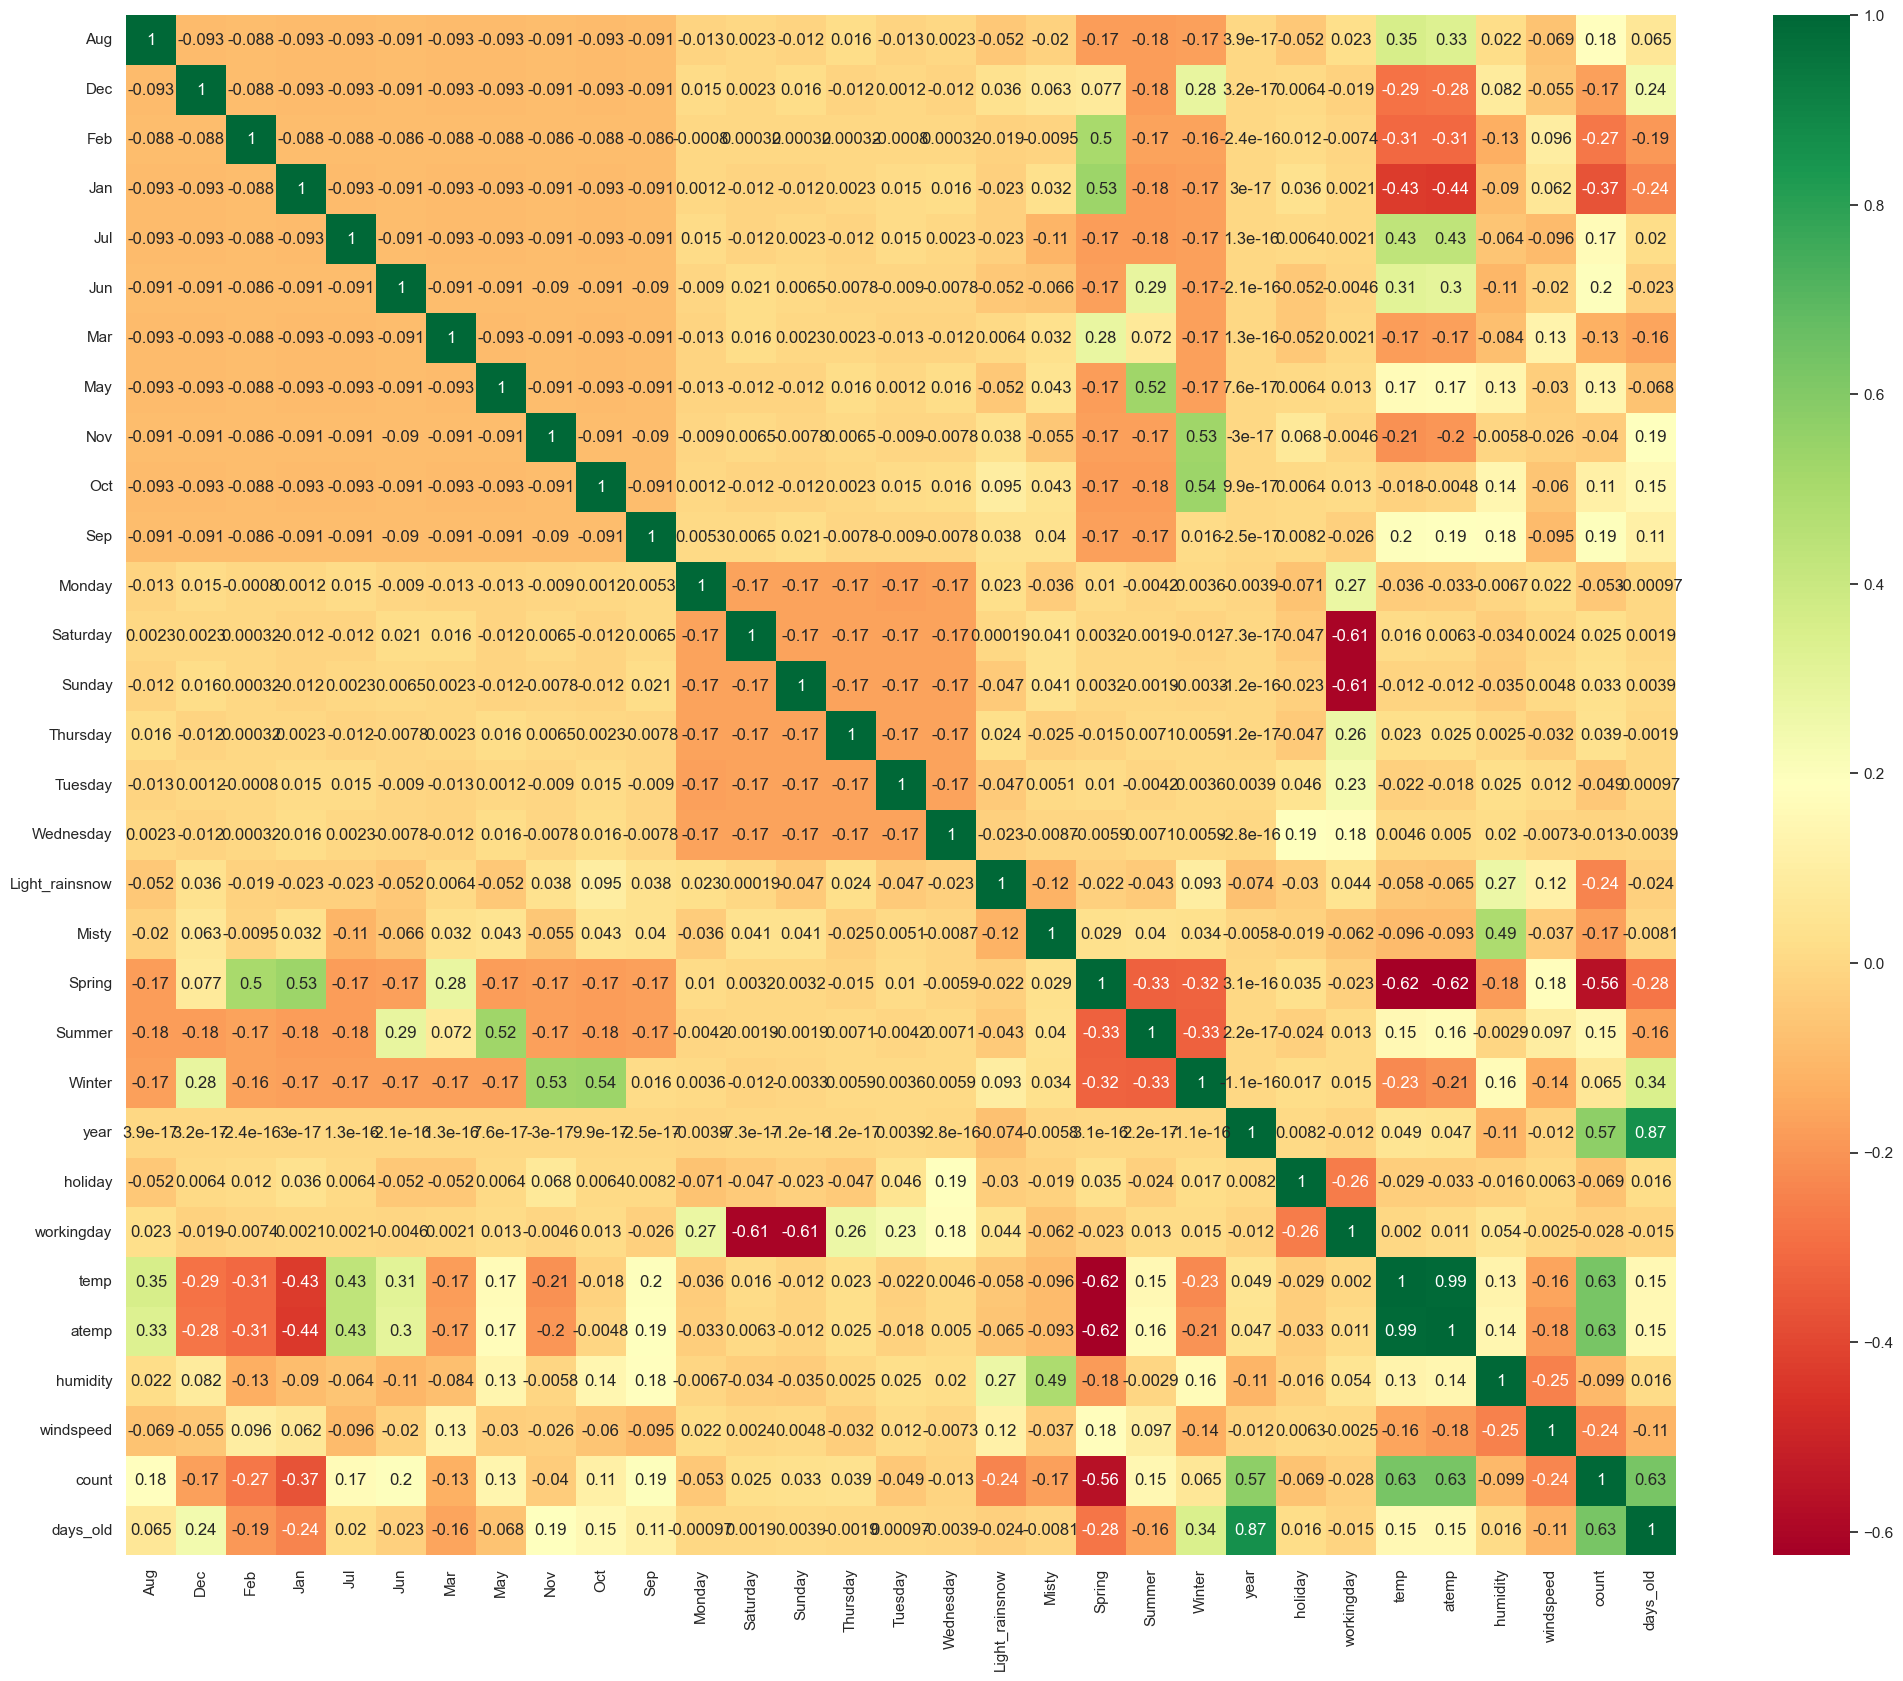

In [243]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike_df_merged.corr(), cmap='RdYlGn', annot = True, fmt='.2g')
plt.show()

### **✅ Observation:**
- We notice that some variables are closely related to each other.
- We'll pick either temperature(`temp`) or apparent/feeling temperature(`atemp`) because they're very similar.
- Temperature(`temp`), apparent/feeling temperature(`atemp`), and year are strongly connected to the number of counts(`cnt`).
- In `spring`, the count(`cnt`) tends to go down (negative correlated).
- `Misty weather` and `humidity` go hand in hand(corelated).
- The months match up with the expected weather patterns.

# Splitting the data into Train and Test Data set


In [244]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike_df_merged,train_size = 0.7, random_state=100)

In [245]:
bike_train.shape


(510, 31)

In [246]:
bike_train.describe()


Aug         Dec         Feb         Jan         Jul         Jun  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.096078    0.084314    0.066667    0.088235    0.076471    0.076471   
std      0.294988    0.278131    0.249689    0.283915    0.266010    0.266010   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Mar         May         Nov         Oct         Sep      Monday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.098039    0.084314    0.086275    0.084314    0.080392    0.154902   
std      0.297660    0.278131    0.281045    0.278131    0.272166    0.362166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Saturday      Sunday    Thursday     Tuesday   Wednesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.129412    0.137255    0.143137    0.152941    0.135294   
std      0.335985    0.344454    0.350557    0.360284    0.342373   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Light_rainsnow       Misty      Spring      Summer      Winter  \
count      510.000000  510.000000  510.000000  510.000000  510.000000   
mean         0.029412    0.345098    0.243137    0.247059    0.247059   
std          0.169124    0.475867    0.429398    0.431725    0.431725   
min          0.000000    0.000000    0.000000    0.000000    0.000000   
25%          0.000000    0.000000    0.000000    0.000000    0.000000   
50%          0.000000    0.000000    0.000000    0.000000    0.000000   
75%          0.000000    1.000000    0.000000    0.000000    0.000000   
max          1.000000    1.000000    1.000000    1.000000    1.000000   

             year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765   20.108257   23.500287   63.123710   
std      0.500429    0.157763    0.453386    7.431626    8.090963   14.153170   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.606865   16.603063   52.270825   
50%      1.000000    0.000000    1.000000   20.277923   24.131150   63.437500   
75%      1.000000    0.000000    1.000000   26.615847   30.177700   73.250025   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.041700   

        windspeed        count    days_old  
count  510.000000   510.000000  510.000000  
mean    12.834912  4485.337255  367.680392  
std      5.292031  1950.666077  209.596164  
min      2.834381    22.000000    0.000000  
25%      9.041918  3120.000000  186.250000  
50%     12.083182  4530.000000  372.000000  
75%     15.750879  5973.500000  551.750000  
max     34.000021  8714.000000  728.000000

In [247]:
print(bike_train.shape)
print(bike_test.shape)

(510, 31)
(220, 31)


### Rescaling the bike_train dataframe

**Note:** We will be using `MinMaxScaler` for scaling the dataframe.

In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [249]:
bike_train.head()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Monday  Saturday  \
576    0    0    0    0    1    0    0    0    0    0    0       0         0   
426    0    0    0    0    0    0    1    0    0    0    0       0         0   
728    0    1    0    0    0    0    0    0    0    0    0       1         0   
482    0    0    0    0    0    0    0    0    0    0    0       0         0   
111    0    0    0    0    0    0    0    0    0    0    0       0         0   

     Sunday  Thursday  Tuesday  Wednesday  Light_rainsnow  Misty  Spring  \
576       0         0        0          1               0      0       0   
426       1         0        0          0               0      1       1   
728       0         0        0          0               0      0       1   
482       1         0        0          0               0      1       0   
111       1         0        0          0               0      1       0   

     Summer  Winter  year  holiday  workingday       temp    atemp  humidity  \
576       0       0     1        0           1  29.246653  33.1448   70.4167   
426       0       0     1        0           0  16.980847  20.6746   62.1250   
728       0       0     1        0           1  10.489153  11.5850   48.3333   
482       1       0     1        0           0  15.443347  18.8752   48.9583   
111       1       0     0        0           0  13.803347  16.0977   72.9583   

     windspeed  count  days_old  
576  11.083475   7216       576  
426  10.792293   4066       426  
728  23.500518   1796       728  
482   8.708325   4220       482  
111  14.707907   1683       111

In [250]:
# Appliyng scaler on numerical vars
num_vars = ['temp', 'humidity', 'windspeed', 'count', 'days_old']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [251]:
bike_train[num_vars].head()


temp  humidity  windspeed     count  days_old
576  0.815169  0.725633   0.264686  0.827658  0.791209
426  0.442393  0.640189   0.255342  0.465255  0.585165
728  0.245101  0.498067   0.663106  0.204096  1.000000
482  0.395666  0.504508   0.188475  0.482973  0.662088
111  0.345824  0.751824   0.380981  0.191095  0.152473

In [252]:
bike_train.describe()

Aug         Dec         Feb         Jan         Jul         Jun  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.096078    0.084314    0.066667    0.088235    0.076471    0.076471   
std      0.294988    0.278131    0.249689    0.283915    0.266010    0.266010   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Mar         May         Nov         Oct         Sep      Monday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.098039    0.084314    0.086275    0.084314    0.080392    0.154902   
std      0.297660    0.278131    0.281045    0.278131    0.272166    0.362166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Saturday      Sunday    Thursday     Tuesday   Wednesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.129412    0.137255    0.143137    0.152941    0.135294   
std      0.335985    0.344454    0.350557    0.360284    0.342373   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Light_rainsnow       Misty      Spring      Summer      Winter  \
count      510.000000  510.000000  510.000000  510.000000  510.000000   
mean         0.029412    0.345098    0.243137    0.247059    0.247059   
std          0.169124    0.475867    0.429398    0.431725    0.431725   
min          0.000000    0.000000    0.000000    0.000000    0.000000   
25%          0.000000    0.000000    0.000000    0.000000    0.000000   
50%          0.000000    0.000000    0.000000    0.000000    0.000000   
75%          0.000000    1.000000    0.000000    0.000000    0.000000   
max          1.000000    1.000000    1.000000    1.000000    1.000000   

             year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440   23.500287    0.650480   
std      0.500429    0.157763    0.453386    0.225858    8.090963    0.145846   
min      0.000000    0.000000    0.000000    0.000000    3.953480    0.000000   
25%      0.000000    0.000000    0.000000    0.339853   16.603063    0.538643   
50%      1.000000    0.000000    1.000000    0.542596   24.131150    0.653714   
75%      1.000000    0.000000    1.000000    0.735215   30.177700    0.754830   
max      1.000000    1.000000    1.000000    1.000000   42.044800    1.000000   

        windspeed       count    days_old  
count  510.000000  510.000000  510.000000  
mean     0.320883    0.513499    0.505055  
std      0.169803    0.224421    0.287907  
min      0.000000    0.000000    0.000000  
25%      0.199179    0.356420    0.255838  
50%      0.296763    0.518638    0.510989  
75%      0.414447    0.684710    0.757898  
max      1.000000    1.000000    1.000000

In [253]:
bike_train.head()


Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Monday  Saturday  \
576    0    0    0    0    1    0    0    0    0    0    0       0         0   
426    0    0    0    0    0    0    1    0    0    0    0       0         0   
728    0    1    0    0    0    0    0    0    0    0    0       1         0   
482    0    0    0    0    0    0    0    0    0    0    0       0         0   
111    0    0    0    0    0    0    0    0    0    0    0       0         0   

     Sunday  Thursday  Tuesday  Wednesday  Light_rainsnow  Misty  Spring  \
576       0         0        0          1               0      0       0   
426       1         0        0          0               0      1       1   
728       0         0        0          0               0      0       1   
482       1         0        0          0               0      1       0   
111       1         0        0          0               0      1       0   

     Summer  Winter  year  holiday  workingday      temp    atemp  humidity  \
576       0       0     1        0           1  0.815169  33.1448  0.725633   
426       0       0     1        0           0  0.442393  20.6746  0.640189   
728       0       0     1        0           1  0.245101  11.5850  0.498067   
482       1       0     1        0           0  0.395666  18.8752  0.504508   
111       1       0     0        0           0  0.345824  16.0977  0.751824   

     windspeed     count  days_old  
576   0.264686  0.827658  0.791209  
426   0.255342  0.465255  0.585165  
728   0.663106  0.204096  1.000000  
482   0.188475  0.482973  0.662088  
111   0.380981  0.191095  0.152473

## Linear Model Building


In [254]:
# Building the model

y_train = bike_train.pop('count')
X_train = bike_train

In [255]:
X_train

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Monday  Saturday  \
576    0    0    0    0    1    0    0    0    0    0    0       0         0   
426    0    0    0    0    0    0    1    0    0    0    0       0         0   
728    0    1    0    0    0    0    0    0    0    0    0       1         0   
482    0    0    0    0    0    0    0    0    0    0    0       0         0   
111    0    0    0    0    0    0    0    0    0    0    0       0         0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...       ...   
578    1    0    0    0    0    0    0    0    0    0    0       0         0   
53     0    0    1    0    0    0    0    0    0    0    0       0         0   
350    0    1    0    0    0    0    0    0    0    0    0       1         0   
79     0    0    0    0    0    0    1    0    0    0    0       0         0   
520    0    0    0    0    0    1    0    0    0    0    0       0         0   

     Sunday  Thursday  Tuesday  Wednesday  Light_rainsnow  Misty  Spring  \
576       0         0        0          1               0      0       0   
426       1         0        0          0               0      1       1   
728       0         0        0          0               0      0       1   
482       1         0        0          0               0      1       0   
111       1         0        0          0               0      1       0   
..      ...       ...      ...        ...             ...    ...     ...   
578       0         0        0          0               0      0       0   
53        0         0        0          0               0      0       1   
350       0         0        0          0               0      1       0   
79        0         0        0          1               0      1       0   
520       0         0        0          1               0      1       0   

     Summer  Winter  year  holiday  workingday      temp     atemp  humidity  \
576       0       0     1        0           1  0.815169  33.14480  0.725633   
426       0       0     1        0           0  0.442393  20.67460  0.640189   
728       0       0     1        0           1  0.245101  11.58500  0.498067   
482       1       0     1        0           0  0.395666  18.87520  0.504508   
111       1       0     0        0           0  0.345824  16.09770  0.751824   
..      ...     ...   ...      ...         ...       ...       ...       ...   
578       0       0     1        0           1  0.863973  35.35440  0.679690   
53        0       0     0        0           1  0.202618  12.28585  0.435939   
350       0       1     0        0           1  0.248216  12.46855  0.577930   
79        1       0     0        0           1  0.462664  20.48675  0.759870   
520       1       0     1        0           1  0.600225  26.29460  0.632030   

     windspeed  days_old  
576   0.264686  0.791209  
426   0.255342  0.585165  
728   0.663106  1.000000  
482   0.188475  0.662088  
111   0.380981  0.152473  
..         ...       ...  
578   0.187140  0.793956  
53    0.111379  0.072802  
350   0.431816  0.480769  
79    0.529881  0.108516  
520   0.359599  0.714286  

[510 rows x 30 columns]

### Recursive Feature Elimination:

We will be using the `LinearRegression` function from `SciKitLearn` for its compatibility with `RFE`.

In [256]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [257]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 20)
rfe =rfe.fit(X_train, y_train)

In [258]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Spring', False, 2),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1)]

In [261]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col = list(col)
col

['Aug',
 'Jan',
 'Sep',
 'Saturday',
 'Sunday',
 'Light_rainsnow',
 'Misty',
 'Winter',
 'year',
 'holiday',
 'workingday',
 'temp',
 'humidity',
 'windspeed',
 'days_old']

In [262]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Dec', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday', 'Spring', 'Summer', 'atemp'],
      dtype='object')

In [263]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Manual Model Development using statsmodel


In [264]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = sm.add_constant(X_train_rfe)


In [271]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(X, y, cols):
    X_train_sm = sm.add_constant(X[cols])
    lm = sm.OLS(y, X_train_sm).fit()
    print(lm.summary())
    return lm


In [289]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def calculateVIF(X, cols=[]):
    cols = X.columns if cols==[] else cols
    df = X[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [290]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

Features     VIF
0            const  370.27
11      workingday   64.34
5           Sunday   36.91
4         Saturday   35.13
15        days_old   15.32
9             year   12.28
10         holiday    6.60
8           Winter    3.39
12            temp    2.05
13        humidity    1.88
2              Jan    1.68
7            Misty    1.57
1              Aug    1.40
6   Light_rainsnow    1.24
3              Sep    1.23
14       windspeed    1.20

Now, building different Models:

### MODEL 1

In [291]:
#Selected columns for Model 1 - all columns selected by RFE

col = ['Aug', 'Jan', 'Sep', 'Saturday', 'Sunday', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday', 
       'workingday', 'temp', 'humidity', 'windspeed', 'days_old']

lr1 = build_model(X_train_rfe, y_train, col)
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.10e-173
Time:                        14:29:17   Log-Likelihood:                 478.03
No. Observations:                 510   AIC:                            -924.1
Df Residuals:                     494   BIC:                            -856.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3171      0.082      3.

Features     VIF
0            const  370.27
11      workingday   64.34
5           Sunday   36.91
4         Saturday   35.13
15        days_old   15.32
9             year   12.28
10         holiday    6.60
8           Winter    3.39
12            temp    2.05
13        humidity    1.88
2              Jan    1.68
7            Misty    1.57
1              Aug    1.40
6   Light_rainsnow    1.24
3              Sep    1.23
14       windspeed    1.20

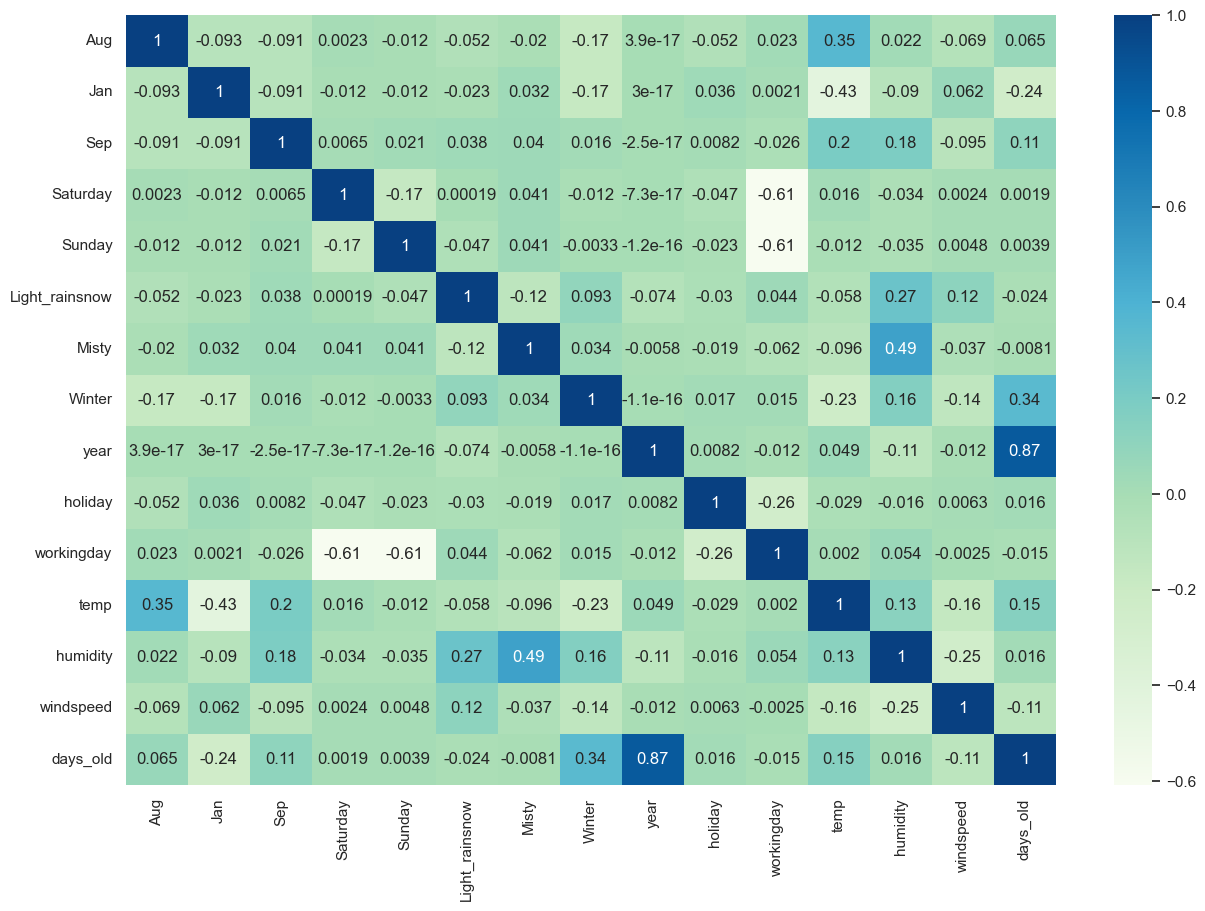

In [292]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike_df_merged[col].corr(), cmap='GnBu', annot=True)
plt.show()

### MODEL 2


In [293]:
# Dropping the variable Sunday as it has negative coefficient and is insignificant as it has high p-value
# col = ['Aug', 'Jan', 'Sep', 'Saturday', 'Sunday', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday', 
#        'workingday', 'temp', 'humidity', 'windspeed', 'days_old']

col_new = ['Aug', 'Jan', 'Sep', 'Saturday', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday',
           'workingday', 'temp', 'humidity', 'windspeed', 'days_old']

lr1 = build_model(X_train_rfe, y_train, col_new)
calculateVIF(X_train_rfe, col_new)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          8.87e-175
Time:                        14:29:20   Log-Likelihood:                 477.98
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     495   BIC:                            -862.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2936      0.032      9.

Features    VIF
13        days_old  59.40
7             year  24.21
11        humidity  22.19
10            temp  12.75
9       workingday   5.71
6           Winter   4.44
12       windspeed   3.79
5            Misty   2.27
3         Saturday   1.81
1              Jan   1.63
0              Aug   1.52
2              Sep   1.31
4   Light_rainsnow   1.20
8          holiday   1.16

### MODEL 3


In [295]:
# Dropping the variable Saturday as it is insignificant as it has high p-value
# col = ['Aug', 'Jan', 'Sep', 'Saturday', 'Sunday', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday', 
#        'workingday', 'temp', 'humidity', 'windspeed', 'days_old']

col_new = ['Aug', 'Jan', 'Sep', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday',
           'workingday', 'temp', 'humidity', 'windspeed', 'days_old']

lr1 = build_model(X_train_rfe, y_train, col_new)
calculateVIF(X_train_rfe, col_new)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          6.74e-176
Time:                        14:30:49   Log-Likelihood:                 477.95
No. Observations:                 510   AIC:                            -927.9
Df Residuals:                     496   BIC:                            -868.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2918      0.031      9.

Features    VIF
12        days_old  59.22
6             year  24.16
10        humidity  21.02
9             temp  12.67
5           Winter   4.44
11       windspeed   3.70
8       workingday   3.63
4            Misty   2.25
1              Jan   1.62
0              Aug   1.52
2              Sep   1.31
3   Light_rainsnow   1.20
7          holiday   1.11

### MODEL 4


In [296]:
# Dropping the variable workingday as it is insignificant as it has high p-value
# col = ['Aug', 'Jan', 'Sep', 'Saturday', 'Sunday', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday', 
#        'workingday', 'temp', 'humidity', 'windspeed', 'days_old']

col_new = ['Aug', 'Jan', 'Sep', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday',
            'temp', 'humidity', 'windspeed', 'days_old']

lr1 = build_model(X_train_rfe, y_train, col_new)
calculateVIF(X_train_rfe, col_new)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          2.03e-176
Time:                        14:31:42   Log-Likelihood:                 476.46
No. Observations:                 510   AIC:                            -926.9
Df Residuals:                     497   BIC:                            -871.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2814      0.031      9.

Features    VIF
11        days_old  59.21
6             year  24.16
9         humidity  19.25
8             temp  12.65
5           Winter   4.44
10       windspeed   3.61
4            Misty   2.19
1              Jan   1.61
0              Aug   1.52
2              Sep   1.31
3   Light_rainsnow   1.19
7          holiday   1.04

### MODEL 5

In [297]:
# Dropping the variable Aug as it is insignificant as it has high p-value
# col = ['Aug', 'Jan', 'Sep', 'Saturday', 'Sunday', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday', 
#        'workingday', 'temp', 'humidity', 'windspeed', 'days_old']

col_new = ['Jan', 'Sep', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday',
            'temp', 'humidity', 'windspeed', 'days_old']

lr1 = build_model(X_train_rfe, y_train, col_new)
calculateVIF(X_train_rfe, col_new)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.2
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.93e-177
Time:                        14:34:20   Log-Likelihood:                 476.12
No. Observations:                 510   AIC:                            -928.2
Df Residuals:                     498   BIC:                            -877.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2777      0.030      9.

Features    VIF
10        days_old  53.78
5             year  22.11
8         humidity  18.63
7             temp  12.13
4           Winter   4.05
9        windspeed   3.52
3            Misty   2.16
0              Jan   1.59
1              Sep   1.22
2   Light_rainsnow   1.19
6          holiday   1.04

### FINAL MODEL

In [315]:
# Dropping the variable days_old as it is insignificant as it has high p-value and high VIF
# col = ['Aug', 'Jan', 'Sep', 'Saturday', 'Sunday', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday', 
#        'workingday', 'temp', 'humidity', 'windspeed', 'days_old']

col_new = ['Jan', 'Sep', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday',
            'temp', 'humidity', 'windspeed']

X_train_final = X_train_rfe[col_new]
X_train_sm = sm.add_constant(X_train_final)

lr1 = build_model(X_train_rfe, y_train, col_new)
calculateVIF(X_train_rfe, col_new)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.9
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.03e-177
Time:                        15:18:17   Log-Likelihood:                 473.95
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     499   BIC:                            -879.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2655      0.030      8.

Features    VIF
8        humidity  17.33
7            temp  10.02
9       windspeed   3.51
3           Misty   2.14
5            year   2.04
4          Winter   1.67
0             Jan   1.44
2  Light_rainsnow   1.18
1             Sep   1.16
6         holiday   1.04

**✅ Observation:**
- There seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.The model looks good to me,hence considering this is as the final model (unless the test data metrics are not significantly close to this number).

In [302]:
# Checking the parameters obtained
lr1.params

const             0.265541
Jan              -0.076828
Sep               0.078676
Light_rainsnow   -0.245748
Misty            -0.048160
Winter            0.094862
year              0.231064
holiday          -0.102554
temp              0.534547
humidity         -0.147751
windspeed        -0.177894
dtype: float64

## Final Model Interpretation

### Hypothesis Testing


Hypothesis Testing States that

``` 
H0: B1=B2=...=Bn=0

H1: At least one Bi!=0 
```

In [304]:
lr1.params


const             0.265541
Jan              -0.076828
Sep               0.078676
Light_rainsnow   -0.245748
Misty            -0.048160
Winter            0.094862
year              0.231064
holiday          -0.102554
temp              0.534547
humidity         -0.147751
windspeed        -0.177894
dtype: float64

From the lr1 model summary, it is evident that all our coefficients are not equal to zero, which means we can **REJECT the NULL HYPOTHESIS**

### F-Staitsics


F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is:

```
F-Statistics : 224.9
Prob (F-statistic): 1.03e-177

```
**✅ Observation:**
The F-Statistics value of 237 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant


### Best fitted model equation


```
count = 0.265541 - (0.076828 * Jan) + (0.078676 * Sep) - (0.245748 * Light_rainsnow) - (0.048160 * Misty) + (0.094862 * Winter) + (0.231064 * year) - (0.102554 * holiday) + (0.534547 * temp) - (0.147751 * humidity) -(0.177894 * windspeed)
```


### Interpretation of the co-efficients


- **const** : The Constant value of `0.265541` indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by `0.265541 units`.
-------
- **Jan** : A coefficient value of `-0.076828` indicated that a unit increase in Jan variable, decrease the bike hire numbers by `0.076828 units`.
-------
- **Sep** : A coefficient value of `0.078676` indicated that, a unit increase in Sep variable increases the bike hire numbers by `0.078676 units`.
-------
- **Light_rainsnow** : A coefficient value of `-0.245748` indicated that a unit increase in Light_rainsnow variable, decrease the bike hire numbers by `0.245748 units`.
-------
- **Misty** : A coefficient value of `-0.048160` indicated that a unit increase in Misty variable, decrease the bike hire numbers by `0.048160 units`.
-------
- **Winter** : A coefficient value of `0.094862` indicated that, a unit increase in Winter variable increases the bike hire numbers by `0.094862 units`.
-------
- **year** : A coefficient value of `0.231064` indicated that, a unit increase in year variable increases the bike hire numbers by `0.231064 units`.
-------
- **holiday** : A coefficient value of `-0.102554` indicated that a unit increase in holiday variable, decrease the bike hire numbers by `0.102554 units`.
-------
- **temp** : A coefficient value of `0.534547` indicated that, a unit increase in temp variable increases the bike hire numbers by `0.534547 units`.
-------
- **humidity** : A coefficient value of `-0.147751` indicated that a unit increase in humidity variable, decrease the bike hire numbers by `0.147751 units`.
-------
- **windspeed** : A coefficient value of `-0.177894` indicated that a unit increase in windspeed variable, decrease the bike hire numbers by `0.177894 units`.
-------

## Model Validation


Validating the assumption of Linear Regression Model:
- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

### Analyzing Linear relationship

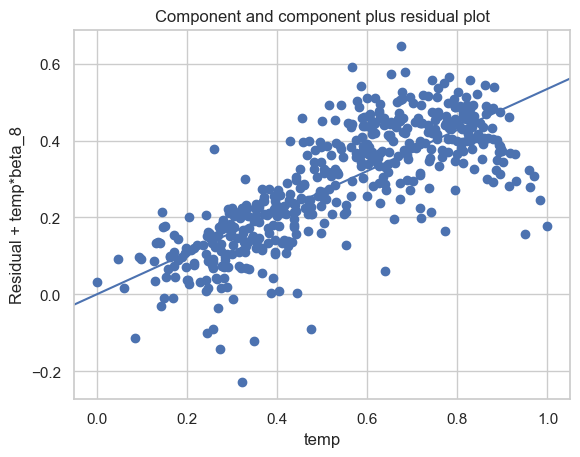

In [306]:
sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

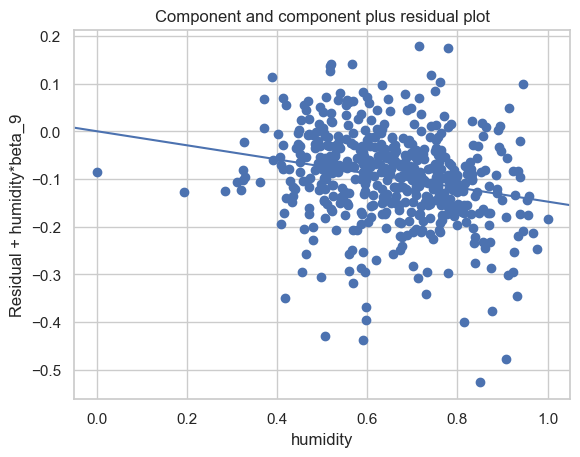

In [307]:
sm.graphics.plot_ccpr(lr1, 'humidity')
plt.show()

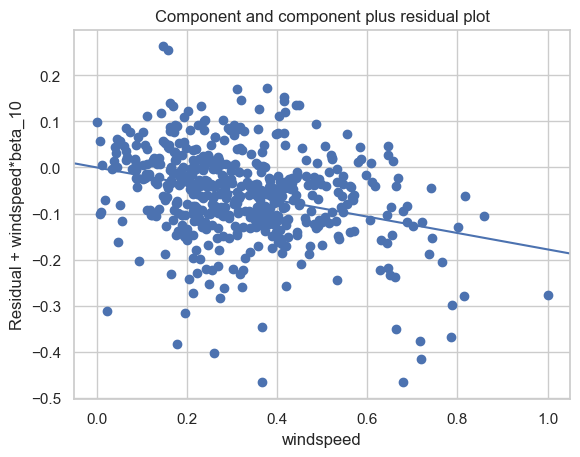

In [308]:
sm.graphics.plot_ccpr(lr1, 'windspeed')
plt.show()

**✅ Observation:**
- The above plots depict the relationship between the model and the different predictor variables. We can clearly see that the linearity is well preserved.

### Homoscedasticity

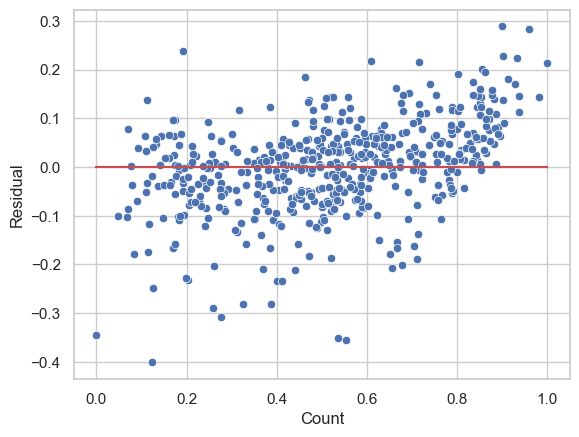

In [312]:
y_train_pred = lr1.predict(X_train_sm)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**✅ Observation:**
- No such visible pattern observed in residual values, thus we can conclude homoscedasticity is well preserved

### Multicolinearity


In [316]:
X_train_final.columns

Index(['Jan', 'Sep', 'Light_rainsnow', 'Misty', 'Winter', 'year', 'holiday',
       'temp', 'humidity', 'windspeed'],
      dtype='object')

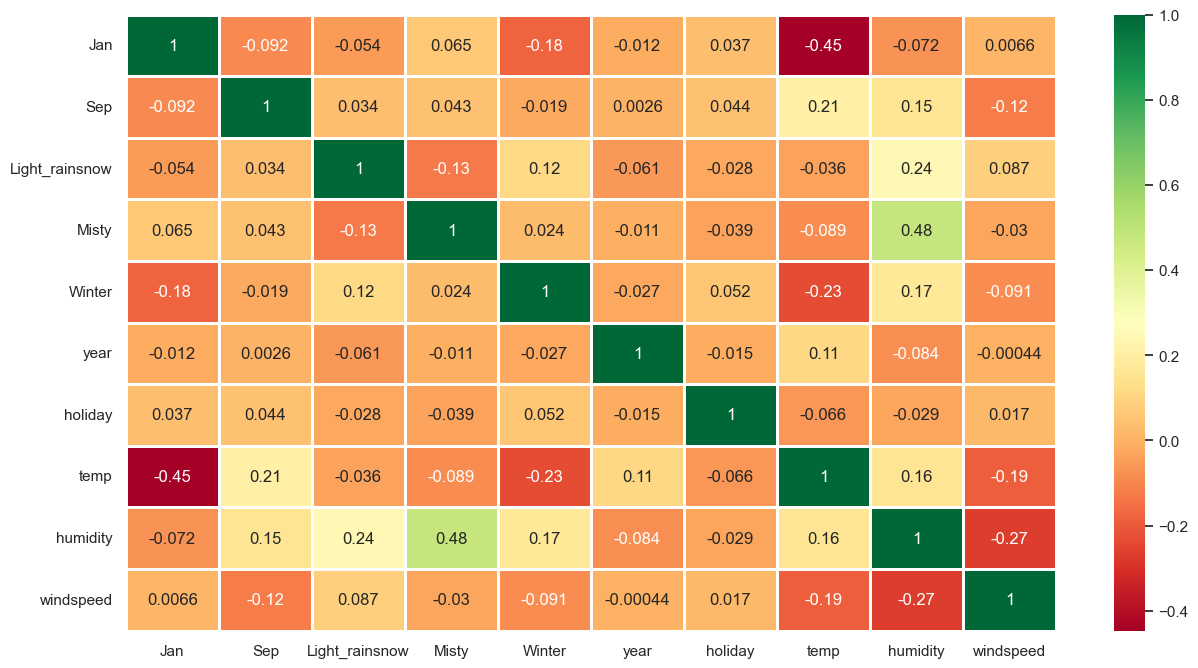

In [317]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_final.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [318]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_final)

Features    VIF
8        humidity  17.33
7            temp  10.02
9       windspeed   3.51
3           Misty   2.14
5            year   2.04
4          Winter   1.67
0             Jan   1.44
2  Light_rainsnow   1.18
1             Sep   1.16
6         holiday   1.04

**✅ Observation:**
- Since the VIF value is less than 5 for almost all predictor variables we can conclude that the multicollinearity is quite insignificant.

### Normality of Error


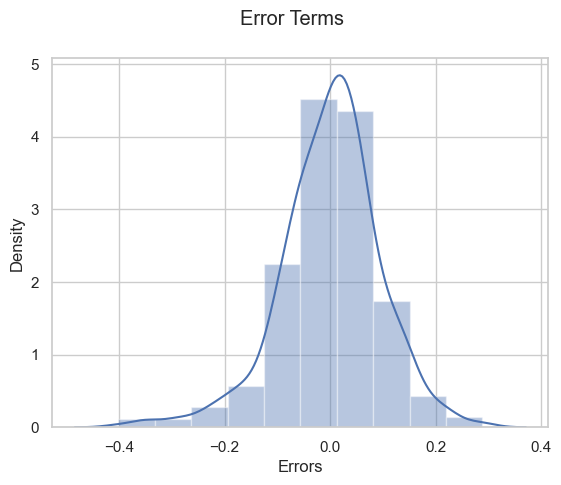

In [321]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 10)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

**✅ Observation:**
- Based on the above plot we can conclude that the error is normally distributed

## Predictions based on final model


Applying scaler.transform() to all numeric variables in test dataset.



In [325]:
num_vars = ['temp', 'humidity', 'windspeed','count', 'days_old']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test[num_vars].head()

temp  humidity  windspeed     count  days_old
184  0.831783  0.657364   0.084219  0.692706  0.252747
535  0.901354  0.610133   0.153728  0.712034  0.734890
299  0.511964  0.837699   0.334206  0.303382  0.410714
221  0.881625  0.437098   0.339570  0.547400  0.303571
152  0.817246  0.314298   0.537414  0.569029  0.208791

In [326]:
bike_test.describe()


Aug         Dec         Feb         Jan         Jul         Jun  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.059091    0.086364    0.100000    0.077273    0.104545    0.095455   
std      0.236333    0.281541    0.300684    0.267633    0.306665    0.294512   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Mar         May         Nov         Oct         Sep      Monday  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.054545    0.086364    0.072727    0.086364    0.086364    0.118182   
std      0.227609    0.281541    0.260281    0.281541    0.281541    0.323559   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Saturday      Sunday    Thursday     Tuesday   Wednesday  \
count  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.172727    0.154545    0.140909    0.122727    0.159091   
std      0.378873    0.362295    0.348721    0.328872    0.366595   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Light_rainsnow       Misty      Spring      Summer      Winter  \
count      220.000000  220.000000  220.000000  220.000000  220.000000   
mean         0.027273    0.318182    0.254545    0.263636    0.236364   
std          0.163248    0.466833    0.436599    0.441609    0.425817   
min          0.000000    0.000000    0.000000    0.000000    0.000000   
25%          0.000000    0.000000    0.000000    0.000000    0.000000   
50%          0.000000    0.000000    0.000000    0.000000    0.000000   
75%          0.000000    1.000000    1.000000    1.000000    0.000000   
max          1.000000    1.000000    1.000000    1.000000    1.000000   

             year     holiday  workingday        temp       atemp    humidity  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718   24.250312    0.638221   
std      0.500809    0.187620    0.480828    0.233187    8.281075    0.148694   
min      0.000000    0.000000    0.000000    0.046591    4.941955    0.261915   
25%      0.000000    0.000000    0.000000    0.355429   17.090025    0.529197   
50%      0.000000    0.000000    1.000000    0.558172   24.700000    0.625590   
75%      1.000000    0.000000    1.000000    0.755981   31.124313    0.743798   
max      1.000000    1.000000    1.000000    0.984424   41.318550    1.002146   

        windspeed       count    days_old  
count  220.000000  220.000000  220.000000  
mean     0.313293    0.522154    0.490559  
std      0.159584    0.219163    0.294116  
min     -0.042808    0.048205    0.004121  
25%      0.198843    0.378595    0.234203  
50%      0.300126    0.524678    0.480082  
75%      0.402718    0.677750    0.740041  
max      0.807474    0.963300    1.001374

### Dividing X_test and y_test


In [327]:
y_test = bike_test.pop('count')
X_test = bike_test

In [328]:
X_train_lm1 = X_train_lm1.drop(['const'], axis = 1)


In [329]:
col1=X_train_lm1.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   Jan             220 non-null    int64  
 2   Sep             220 non-null    int64  
 3   Light_rainsnow  220 non-null    int64  
 4   Misty           220 non-null    int64  
 5   Winter          220 non-null    int64  
 6   year            220 non-null    int64  
 7   holiday         220 non-null    int64  
 8   temp            220 non-null    float64
 9   humidity        220 non-null    float64
 10  windspeed       220 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 20.6 KB


In [330]:
y_pred = lr1.predict(X_test_lm1)


### Model Evaluation


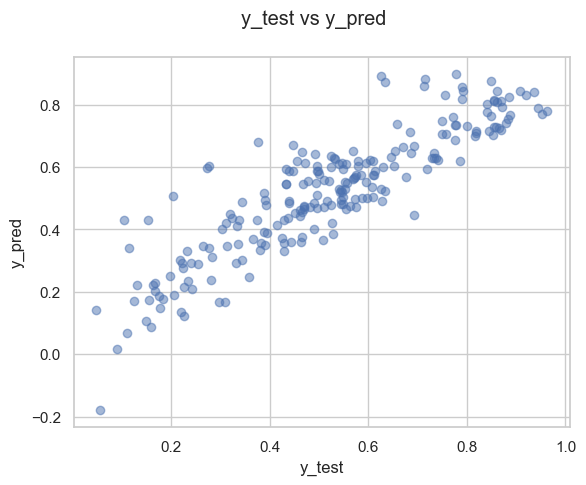

In [333]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

### R2 Value Calculation for bike_test dataframe


In [334]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.7786

### Adjusted R2 Value Calculation for bike_test dataframe

```
((1-R2) x (n-1)) / (n-p-1)
```

In [335]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.768

### Model Train & Test R2 Statsitics Comparison

    Measurement          Train Dataset   Test Dataset

    R2 Value                 81.8%          77.86%

    Adjusted R2 Value        81.5%          76.8%


The model seems to be good enough for generalized datasets.

### Calculating RMSE for the selected Model


In [338]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.1029

### Calculating MAE for the selected Model


In [339]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.079

## Final Analysis


Based on the model, the variables which are influencing the bike bookings are:


**Temperature (Temp)**
- It is evident from the model that customers prefer warm and pleasant temperature for bike booking

**Year**
- There was significant rise in bike booking in 2019 compared to 2018. It is expected that during post-Covid people will avail this service rather travelling in crowded buses and trains

**Season**
- It seems that customers prefered Winter season, hence, a good number of bikes should be available during this time.

**Weather**
- It seems that customers avoided renting bikes during light snow and rain and preferred clear and cloudy weather

### Recommendations to increase sales

**Frequent Sanitisation of Bikes**
- Regularly cleaning(sanitising) the bikes and showing it on the booking app will enhance trust between the customer and the company.

**Providing discounts and better deals**
- In rainy seasons, BoomBike should provide special offers and discounts to draw in more customers.

**Rain Covers or Umbrellas**
- Equipping bikes with attached umbrellas or rain protection gear could entice more customers during the rainy season.